In [257]:
import numpy as np
import glob
import os
%matplotlib inline
from readTRC import readTrc
import matplotlib.pyplot as plt


In [258]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [430]:
cd /Users/austinmcdonald/Desktop/Xenon/Data/

/Users/austinmcdonald/Desktop/Xenon/Data


In [431]:
files = os.listdir()
files.remove('.DS_Store')
files.sort()
#files

In [432]:
name = files[0].split(".")[0]
broken = name.split('_')
percent  = int(broken[0].split('-')[1])
tt = broken[1].split('-')[1]
a, b = tt[:2], tt[2:]
P = a+'.'+b
pressure = float(P)
Efield   = int(broken[2].split('-')[1])

In [433]:
broken[1].split('-')[1]

'01'

In [434]:
tt = broken[1].split('-')[1]
a, b = tt[:2], tt[2:]
P = a+'.'+b
float(P)

1.0

In [435]:
name

'Xe-000_P-01_E-060'

In [436]:
INFO = []
for q in range(0,len(files)):    
    name = files[q].split(".")[0]
    broken = name.split('_')
    percent  = int(broken[0].split('-')[1])
    tt = broken[1].split('-')[1]
    a, b = tt[:2], tt[2:]
    P = a+'.'+b
    pressure = float(P)
    Efield   = int(broken[2].split('-')[1])
    II = [name, percent, pressure, Efield]
    INFO.append(II)

In [342]:
files[4]

'Xe-035_P-03_E-080.txt'

In [314]:
Data = np.loadtxt(files[4])

In [315]:
Data[0]

array([-0.0001999, -0.0001997, -0.0001995, ...,  0.0017999,  0.0018001,
        0.0018003])

In [361]:
def FIND_MIN(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+200
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    miny = min(yyy)
    
    hold      = find_nearest(yyy,miny)
    MINLOC     = np.where(yyy==hold)[0][0]
    
    TT = Trigger+MINLOC
    xxxx = xx[Trigger:TT]
    yyyy = yy[Trigger:TT]
    
    hold      = find_nearest(yyyy,miny*0.1)
    REDGE     = np.where(yyyy==hold)[0][0]
    return MINLOC+Trigger,miny,REDGE+Trigger

In [362]:
def FIND_MAX(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+5
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    maxy = max(yyy)
    
    hold      = find_nearest(yyy,maxy)
    peak     = np.where(yyy==hold)[0][0]

    xxx = xx[Trigger:Trigger+peak]
    yyy = yy[Trigger:Trigger+peak]
    
    hold      = find_nearest(yyy,maxy*0.1)
    edge     = np.where(yyy==hold)[0][0]
    return Trigger+peak, Trigger+edge

In [269]:
files[AA]

'Xe-099_P-01_E-200.txt'

In [270]:
AA = 28
#for x in range(0,len(files)):
Data = np.loadtxt(files[AA])

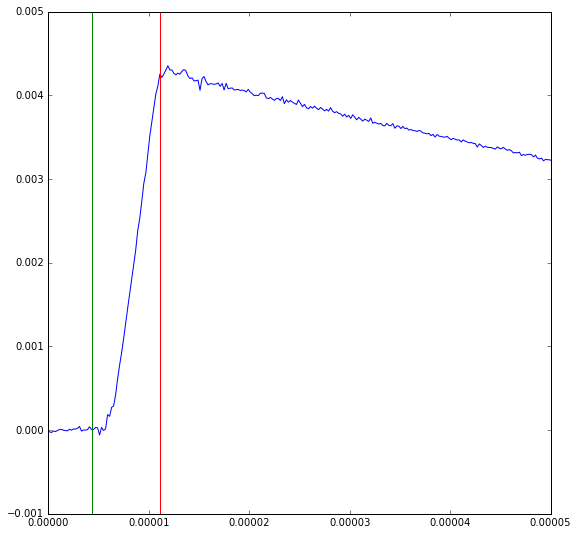

In [271]:
plt.figure(figsize=(9,9))
plt.plot(Data[0],Data[1])
pp,ee = FIND_MAX(Data[0],Data[1])
plt.axvline(Data[0][pp],color='r')
plt.axvline(Data[0][ee],color='g')

plt.xlim(0,0.00005)

plt.show()


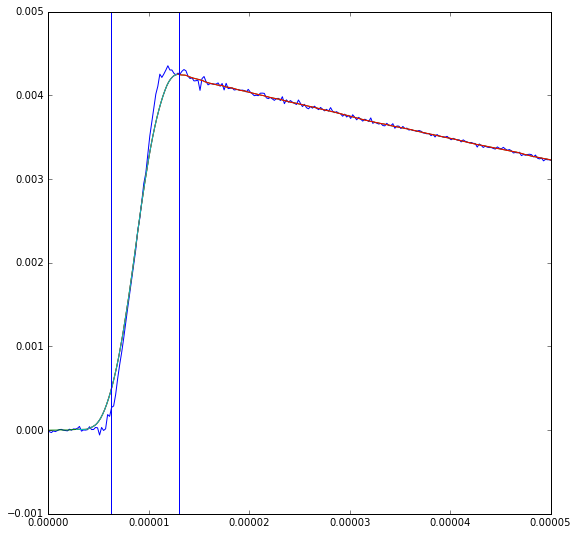

In [272]:

plt.figure(figsize=(9,9))
plt.plot(Data[0],Data[1])
#MM, MIN, RE = FIND_MIN(Data[0],Data[2])
#plt.axvline(Data[0][MM],color='r')
#plt.axvline(Data[0][RE],color='k')
TriggerTime = find_nearest(Data[0],0)
Trigger     = np.where(Data[0]==TriggerTime)[0][0]+5

xx = moving_average(Data[0],20)
yy = moving_average(Data[1],20)
plt.plot(xx,yy)

xxx = xx[Trigger:]
yyy = yy[Trigger:]
plt.plot(xxx,yyy)
maxy = max(yyy)

hold      = find_nearest(yyy,maxy)
holdd     = np.where(yyy==hold)[0][0]
plt.axvline(xxx[holdd])
#plt.axvline(Data[0][Trigger+holdd])

xxx = xx[Trigger:Trigger+holdd]
yyy = yy[Trigger:Trigger+holdd]
plt.plot(xxx,yyy)
hold      = find_nearest(yyy,maxy*0.1)
holdd     = np.where(yyy==hold)[0][0]
plt.axvline(xxx[holdd])


plt.xlim(0,0.00005)
plt.show()


In [273]:
TriggerTime = find_nearest(Data[0],0)
Trigger     = np.where(Data[0]==TriggerTime)[0][0]

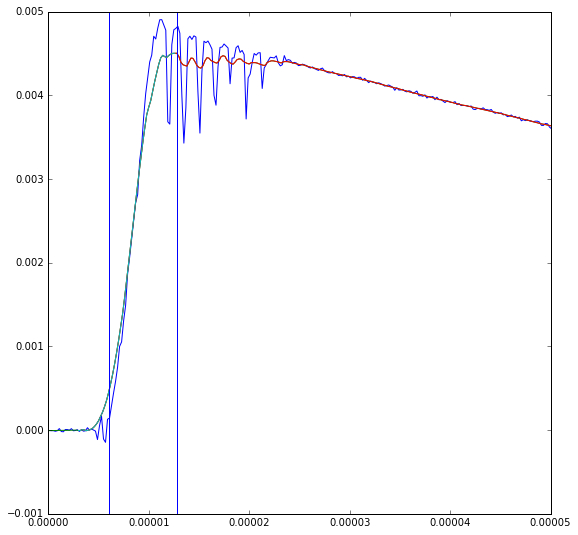

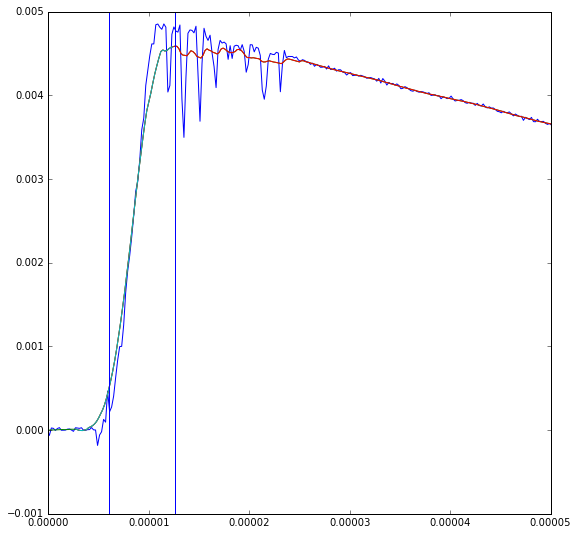

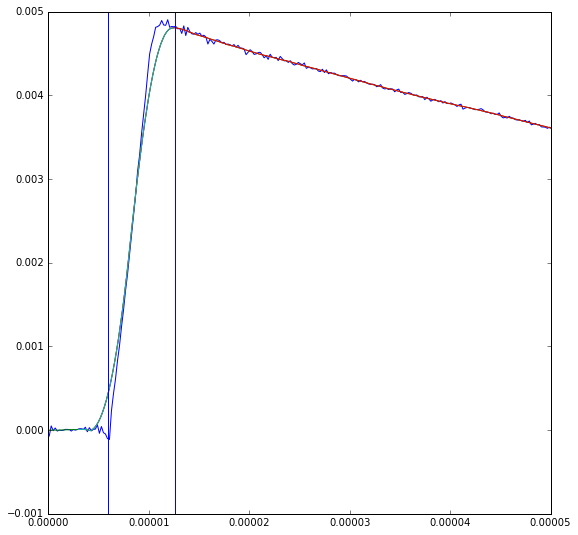

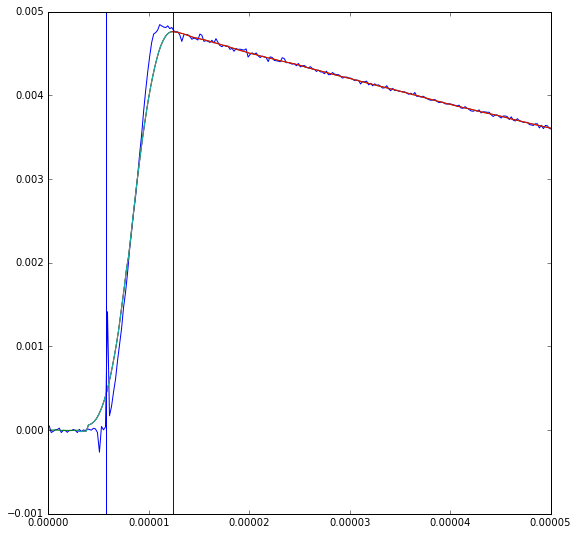

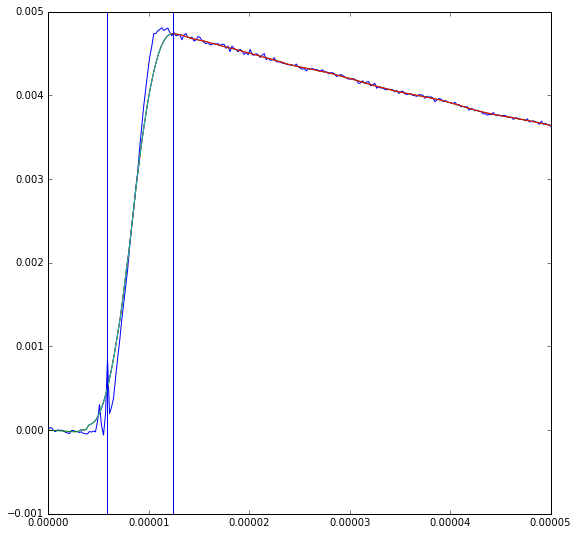

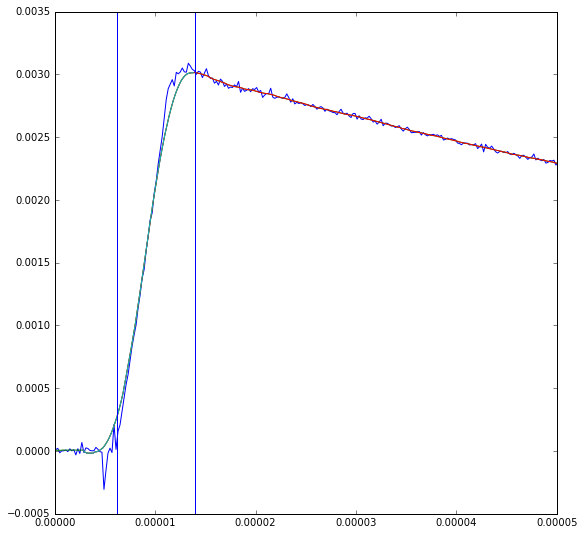

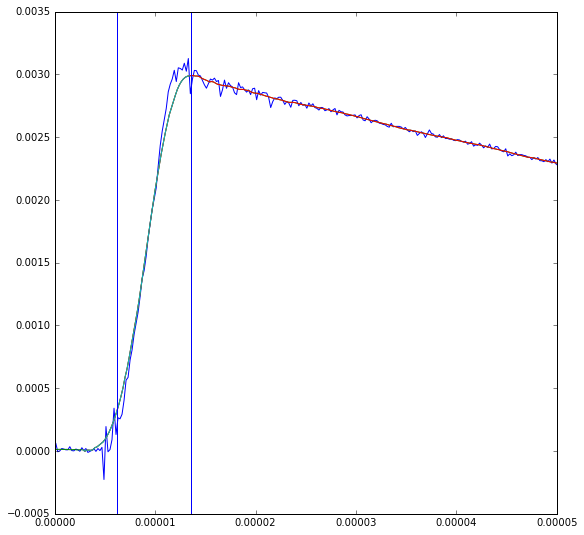

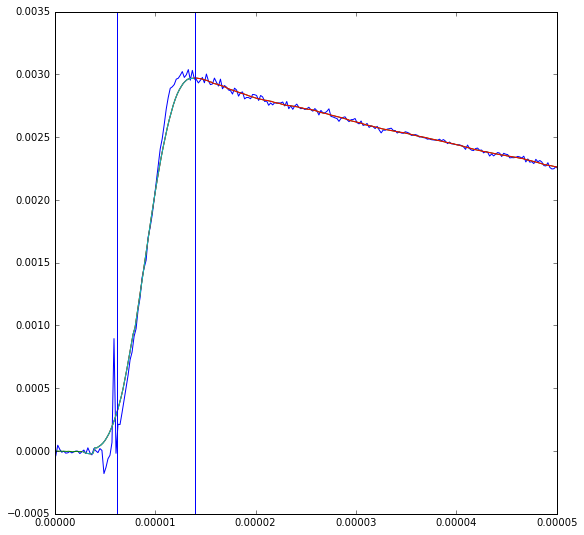

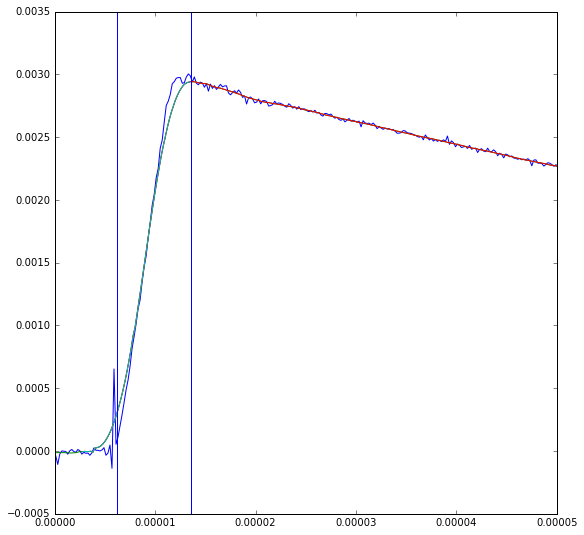

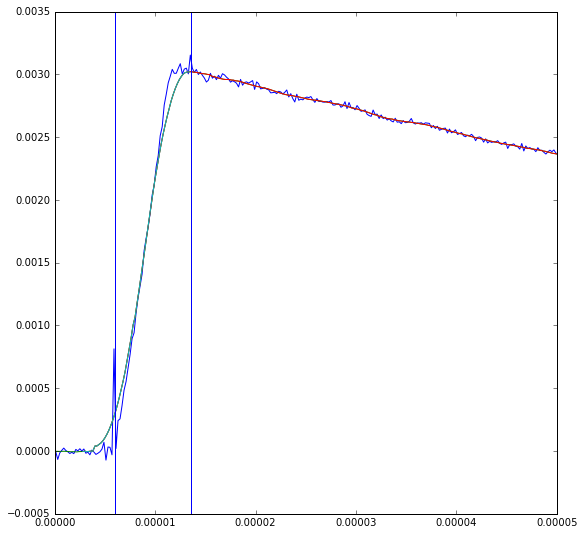

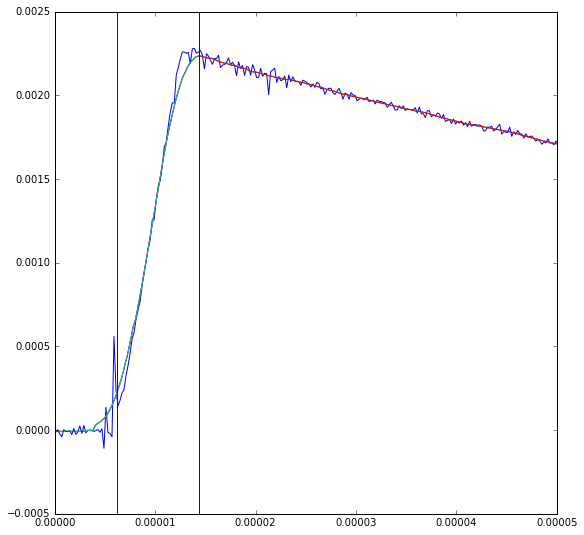

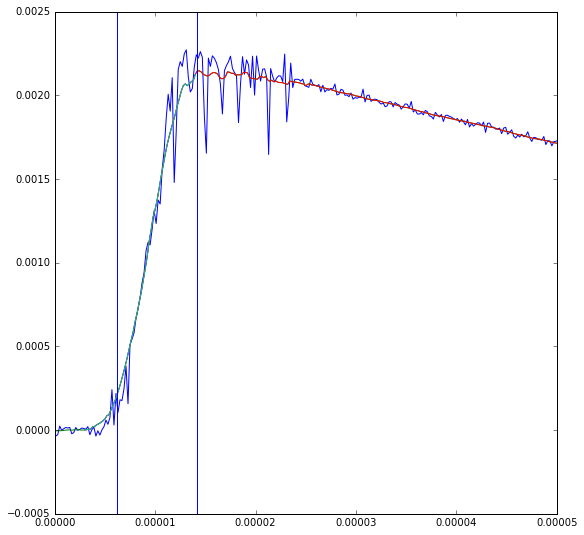

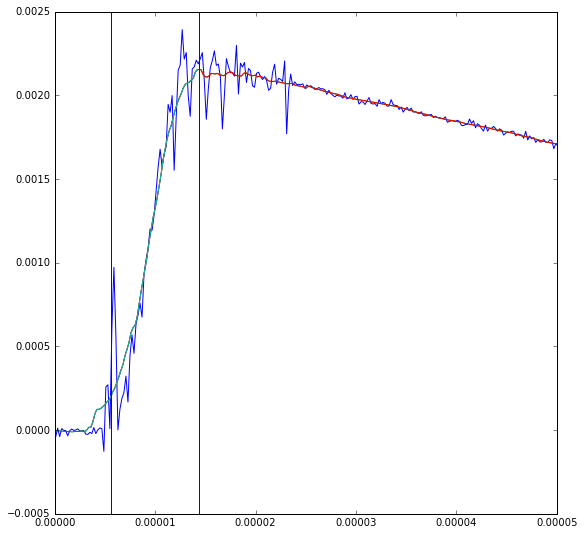

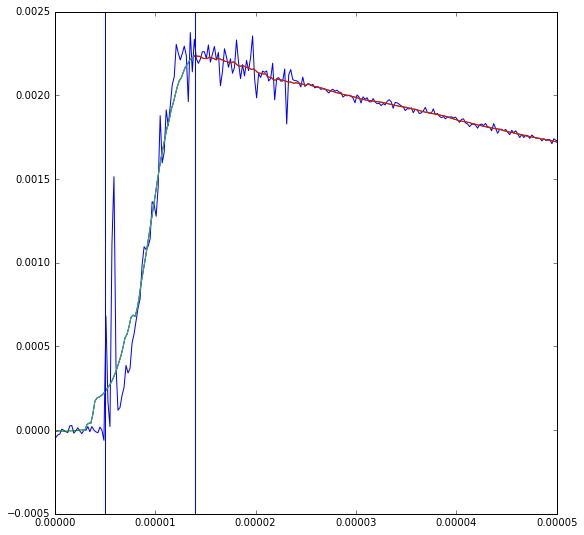

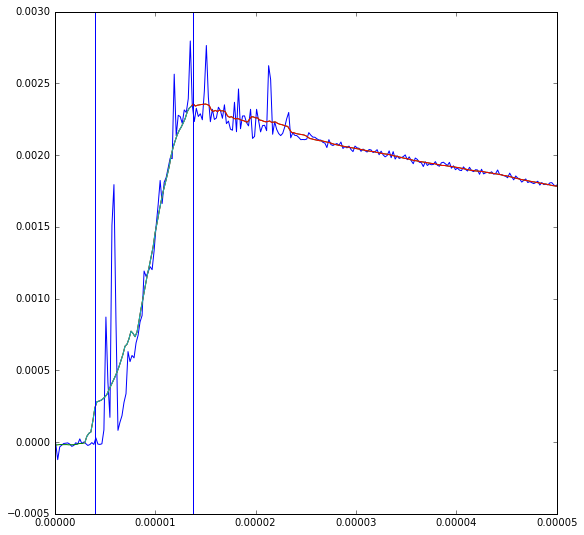

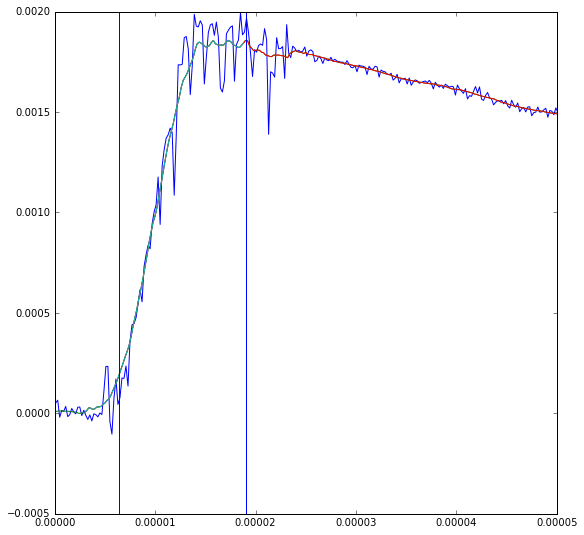

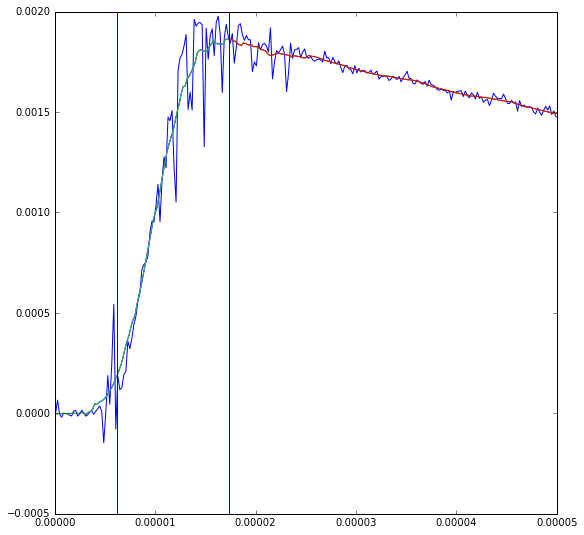

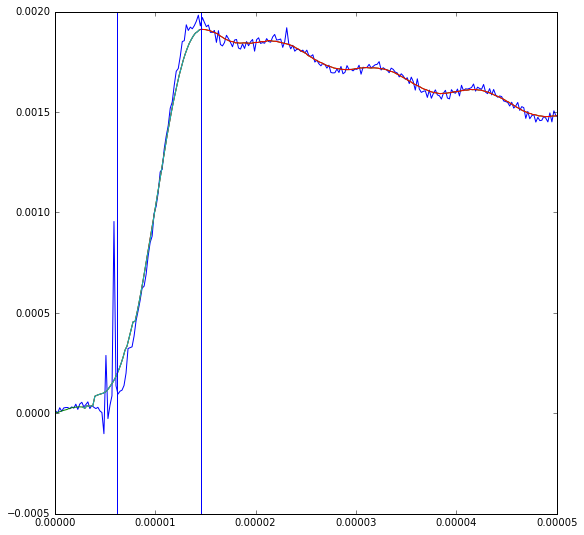

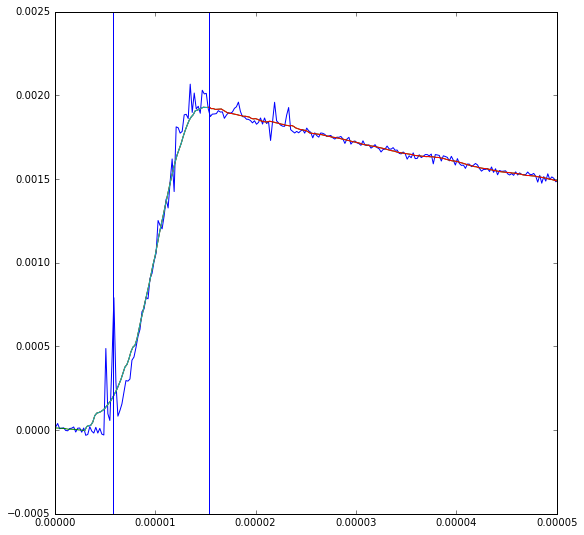

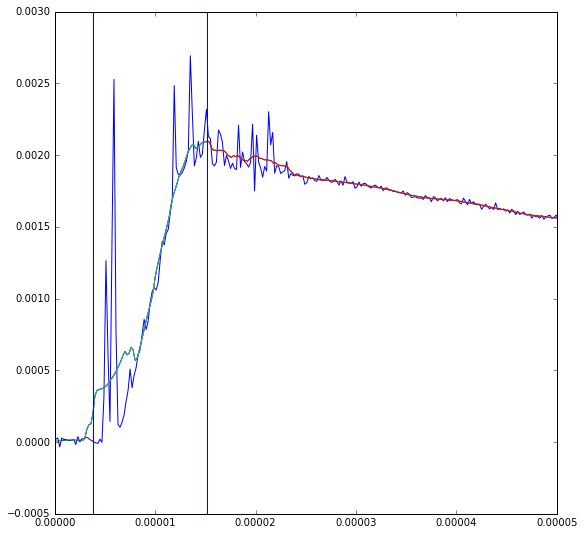

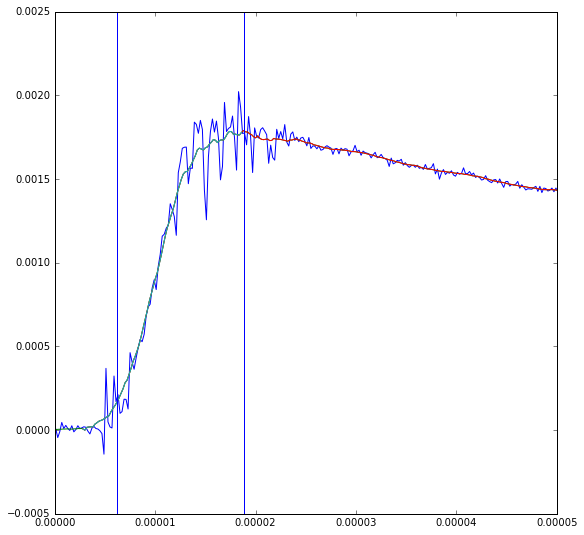

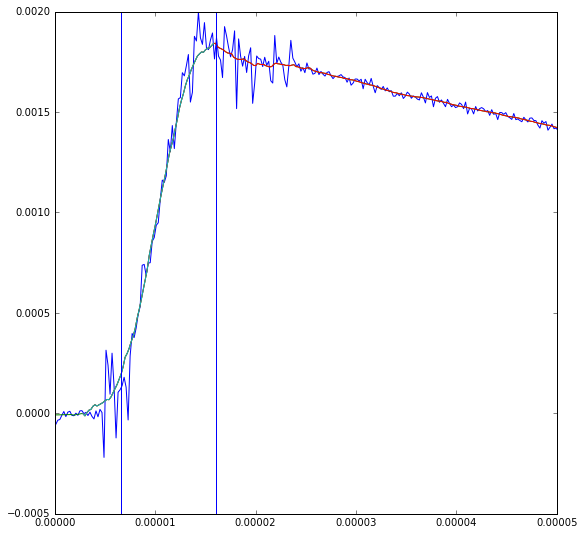

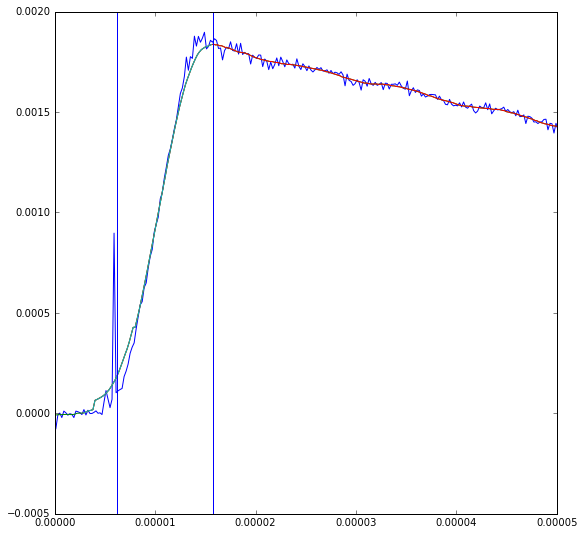

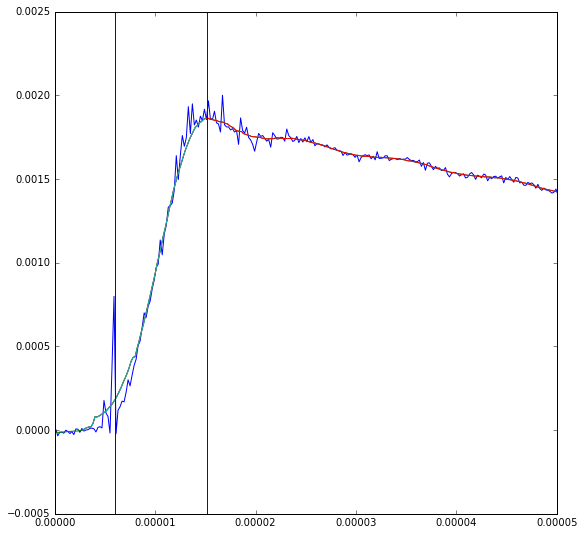

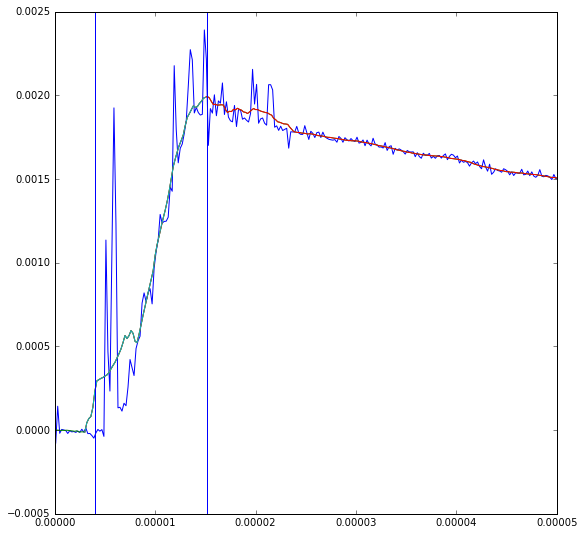

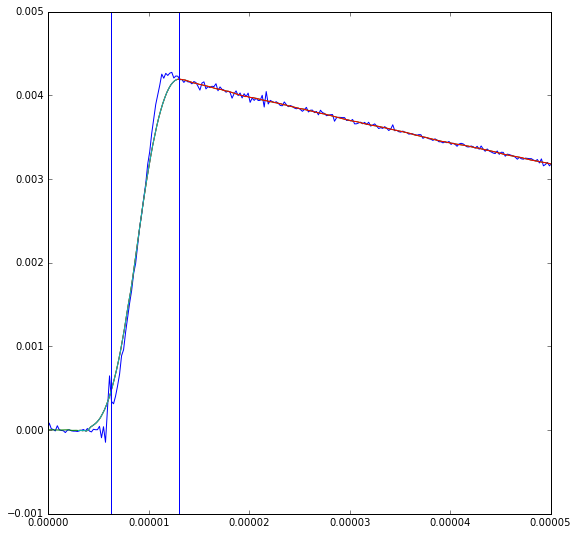

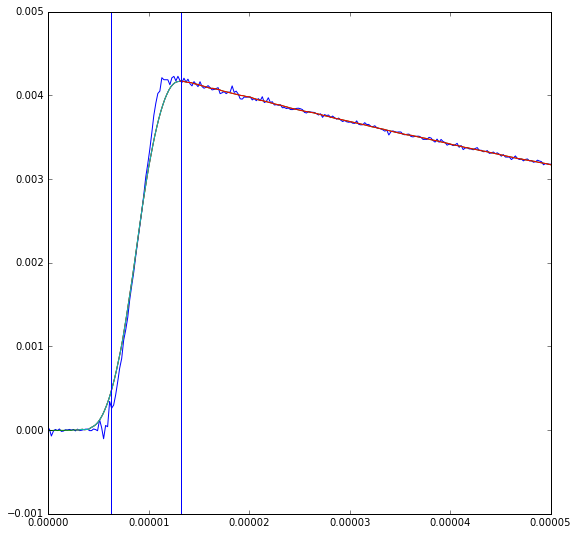

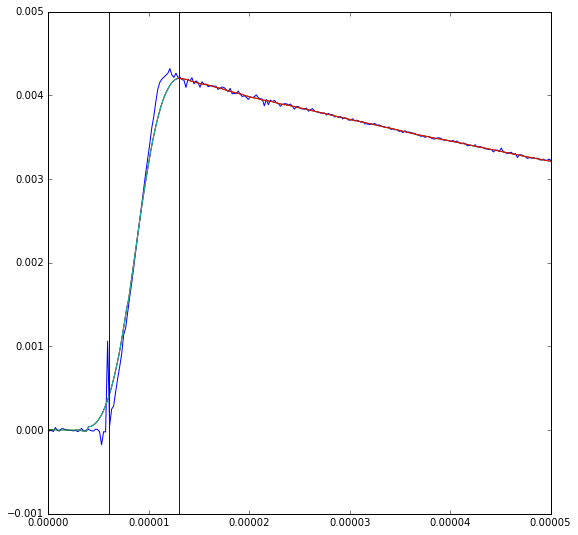

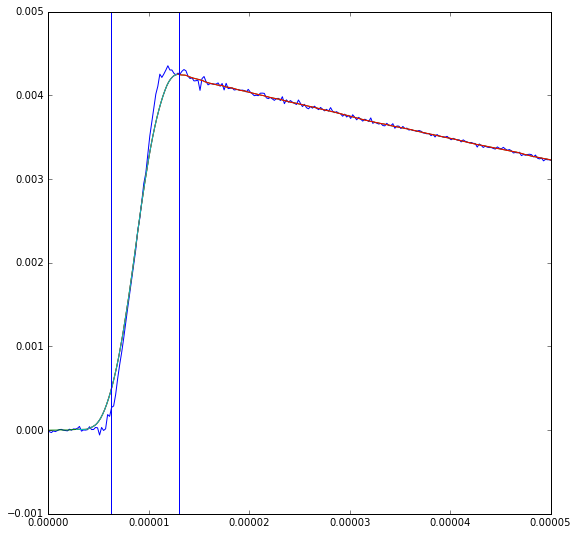

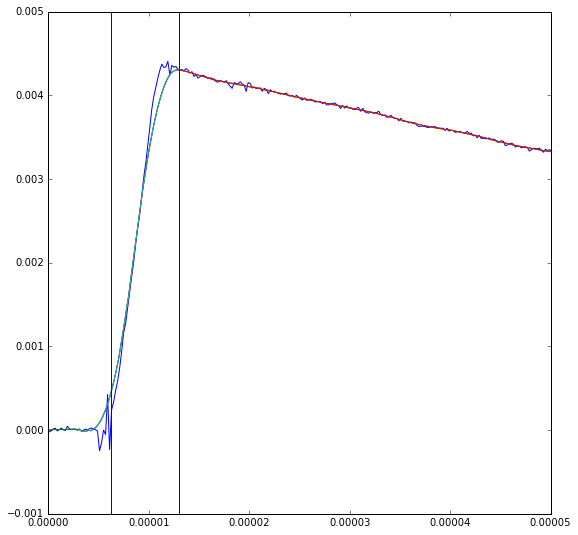

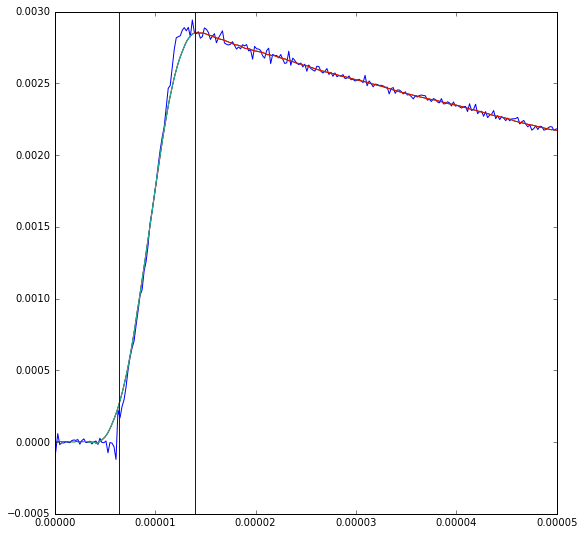

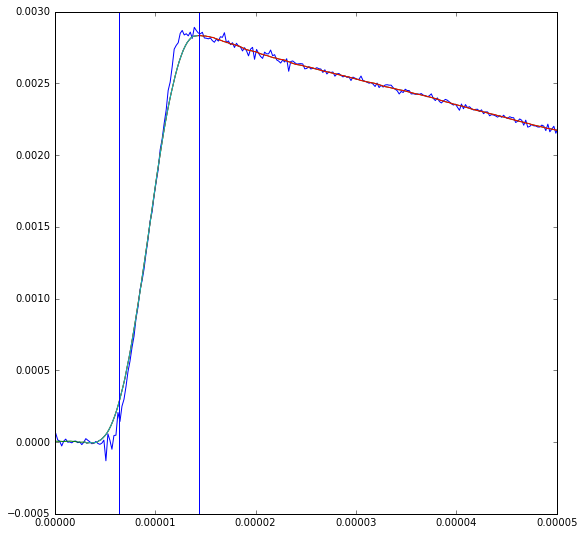

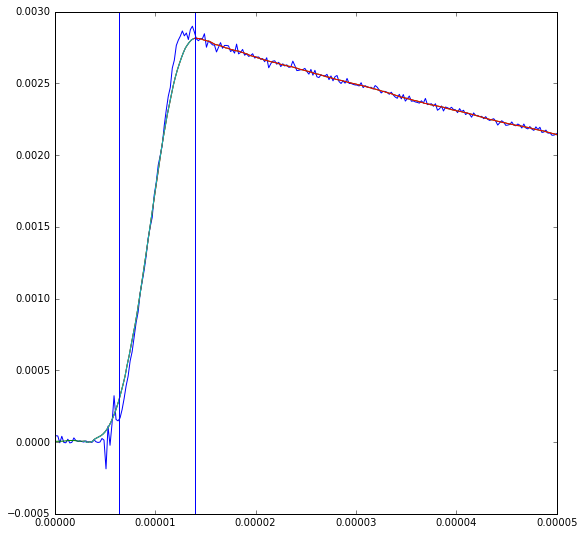

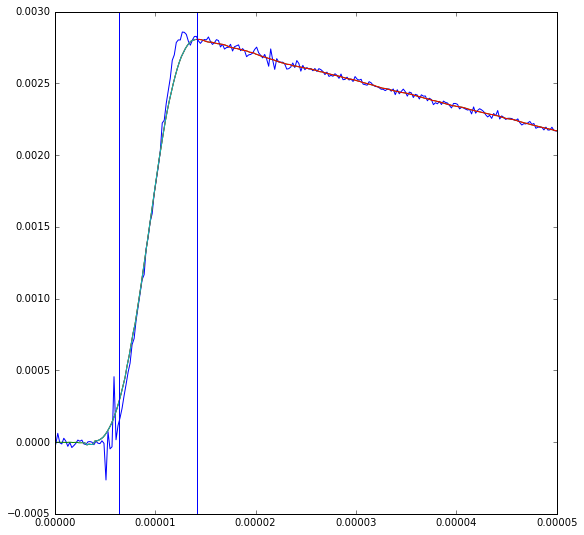

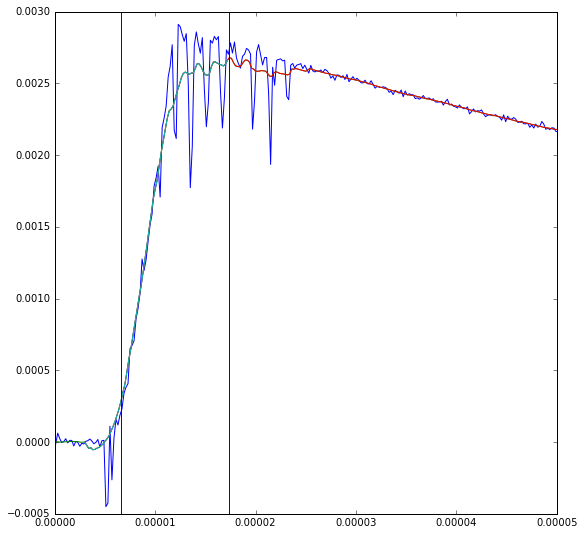

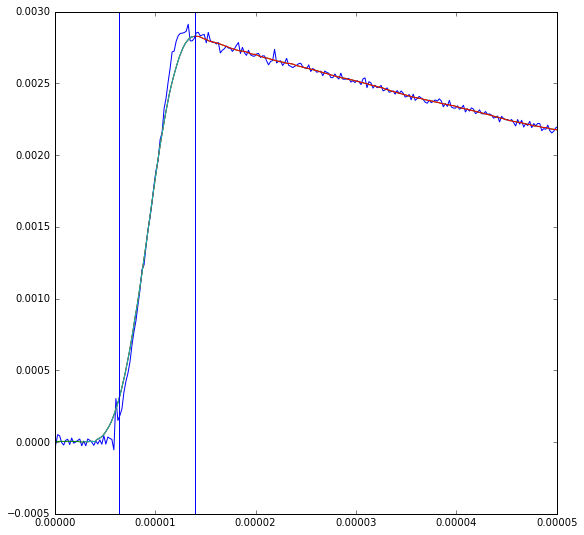

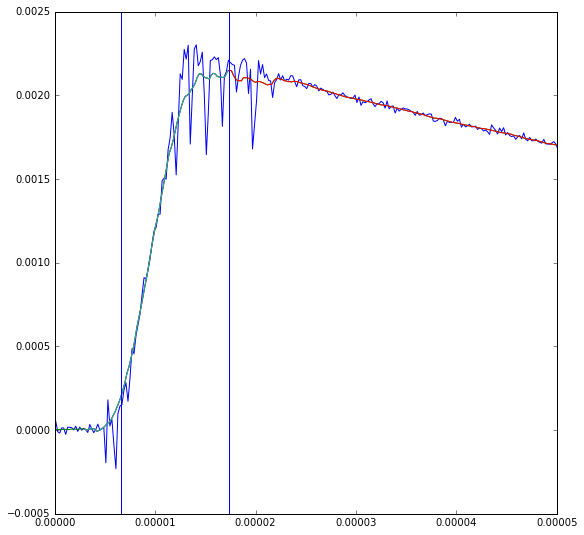

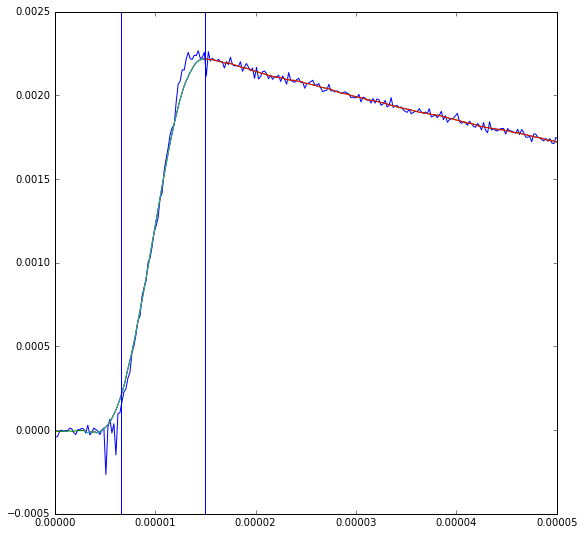

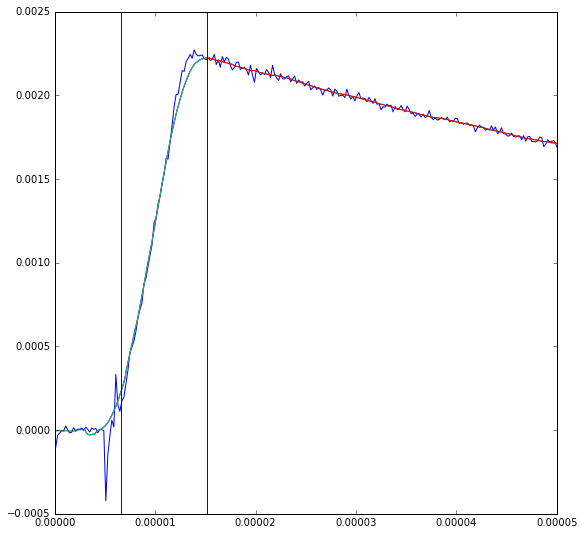

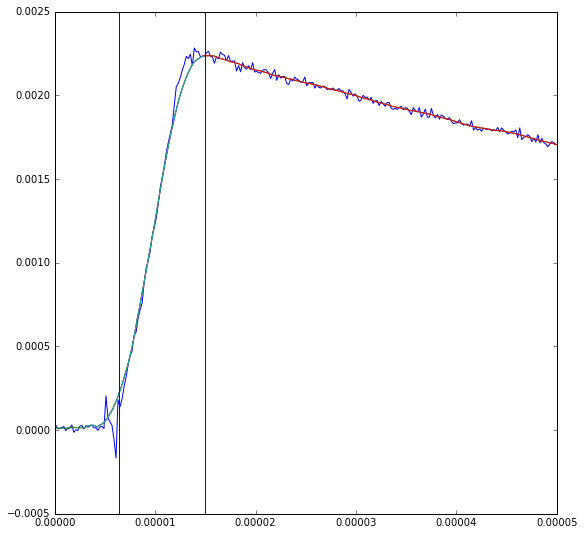

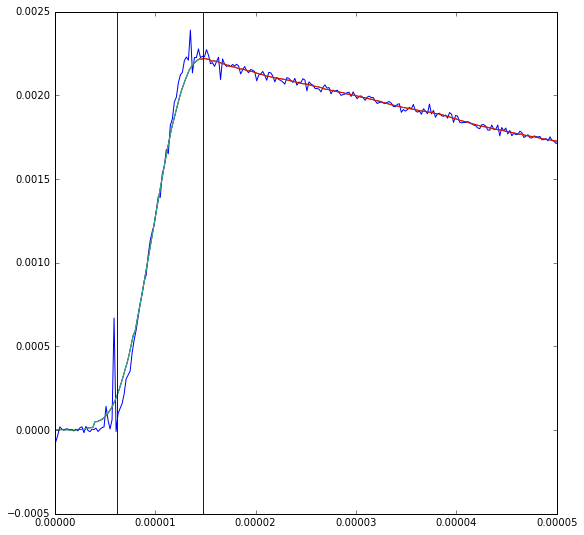

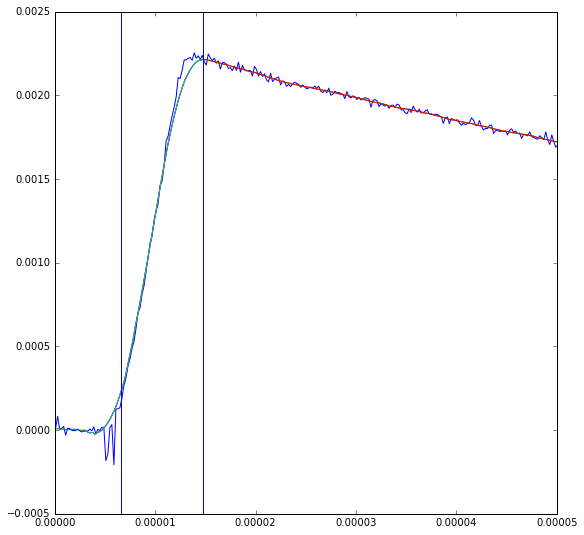

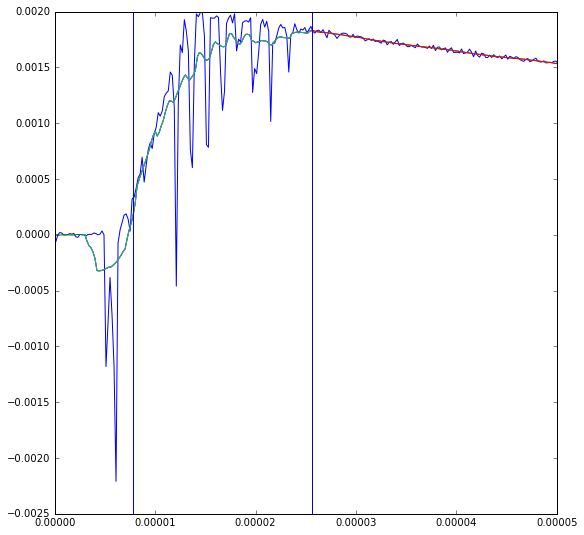

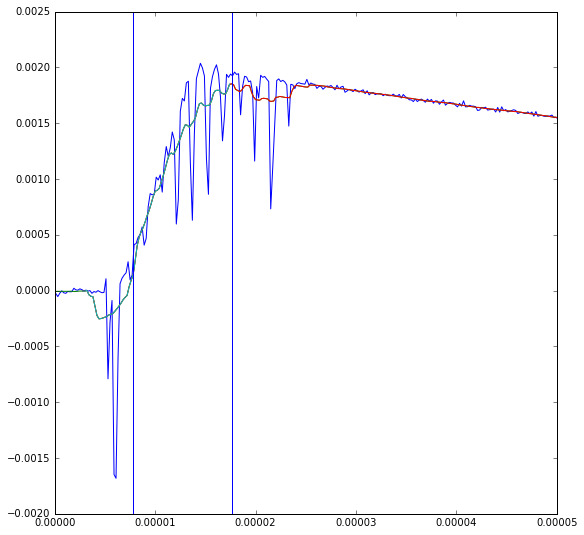

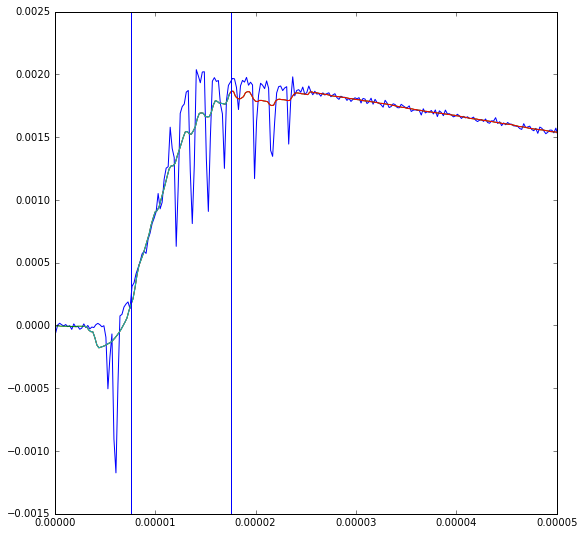

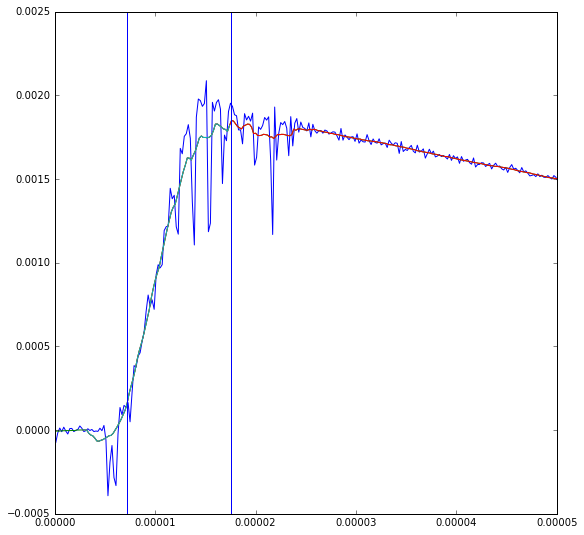

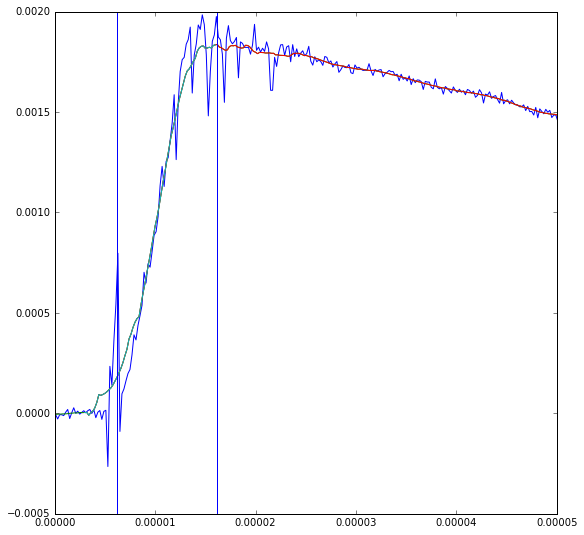

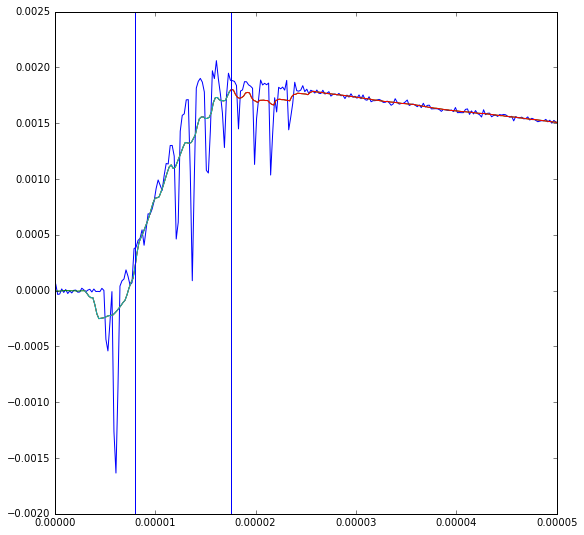

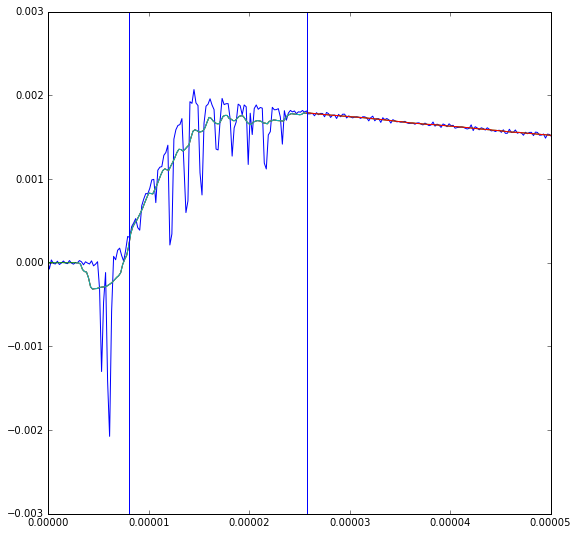

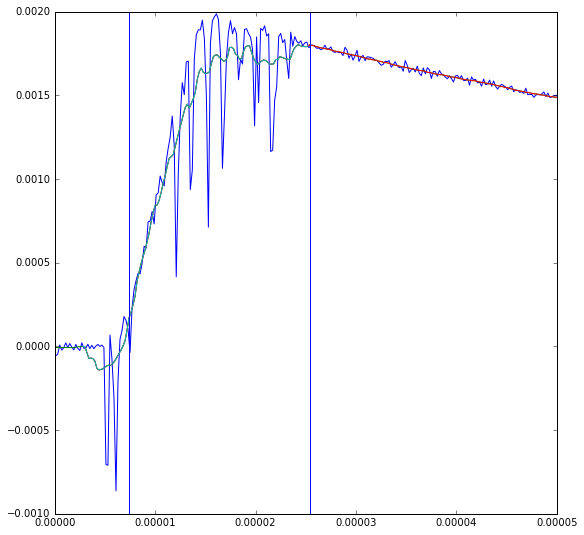

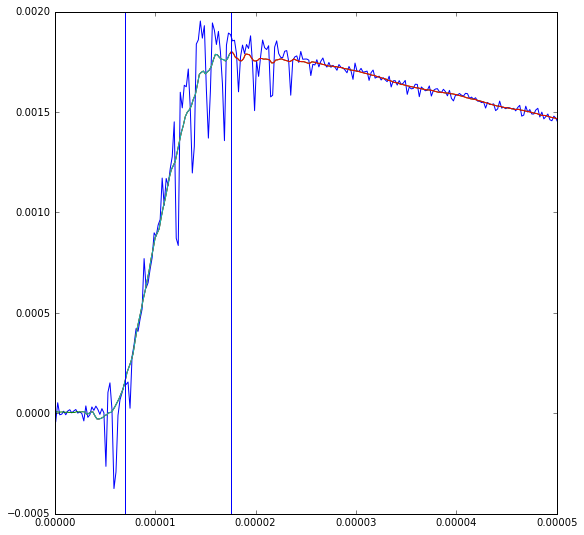

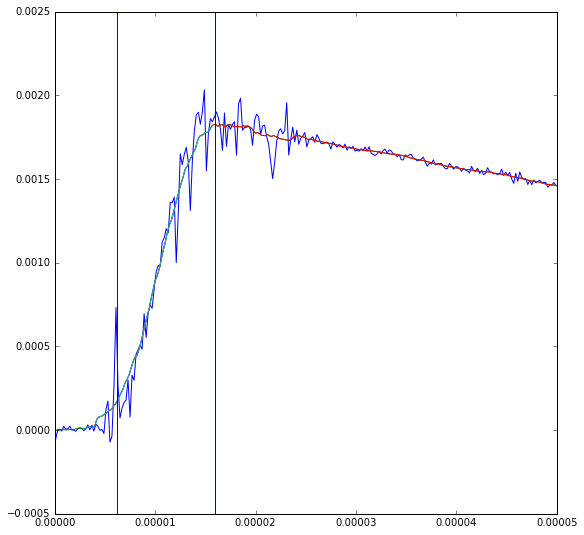

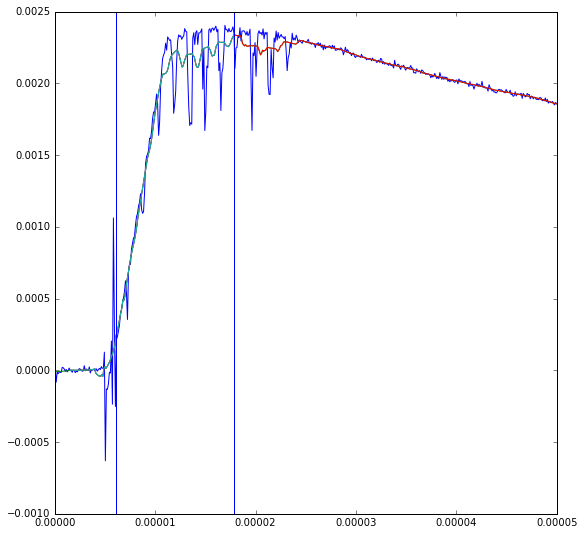

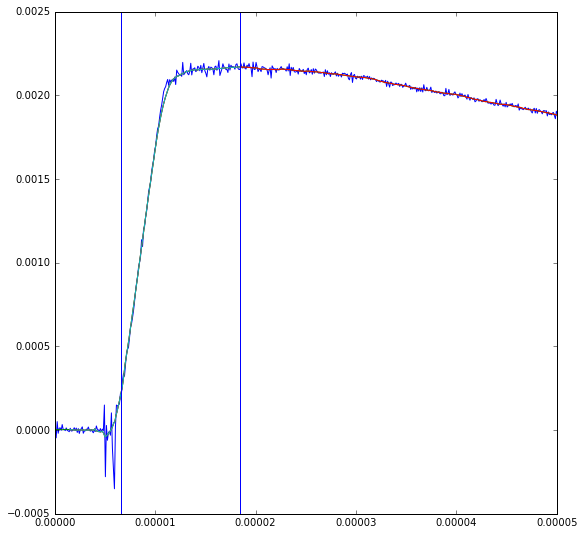

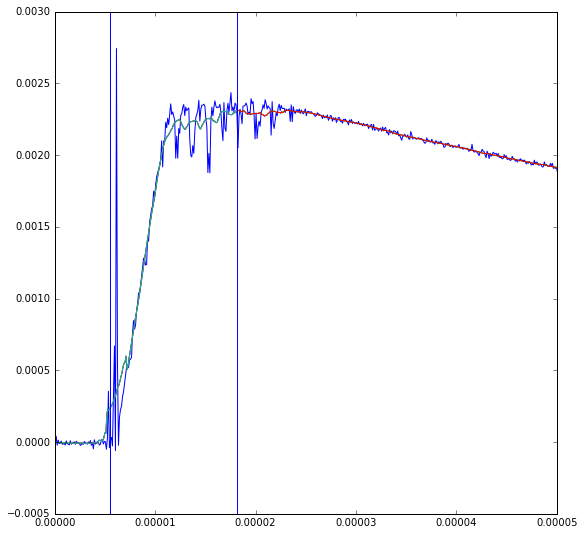

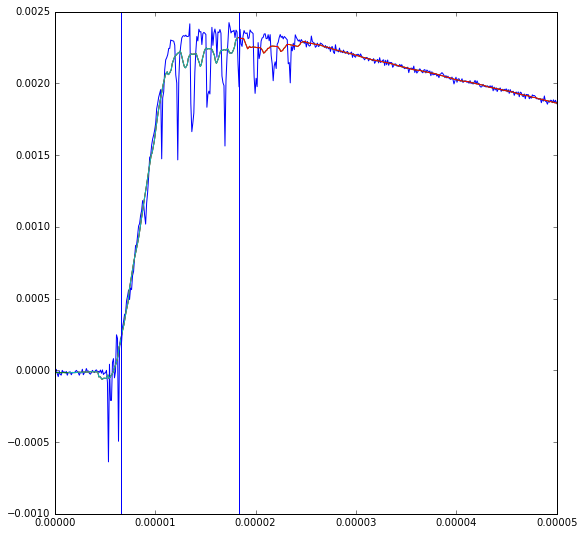

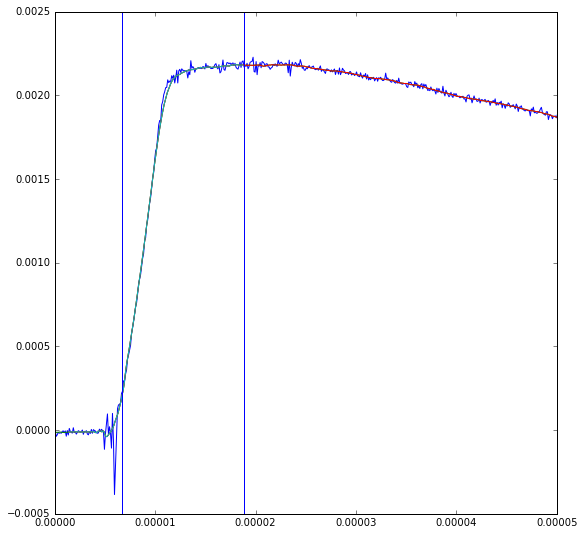

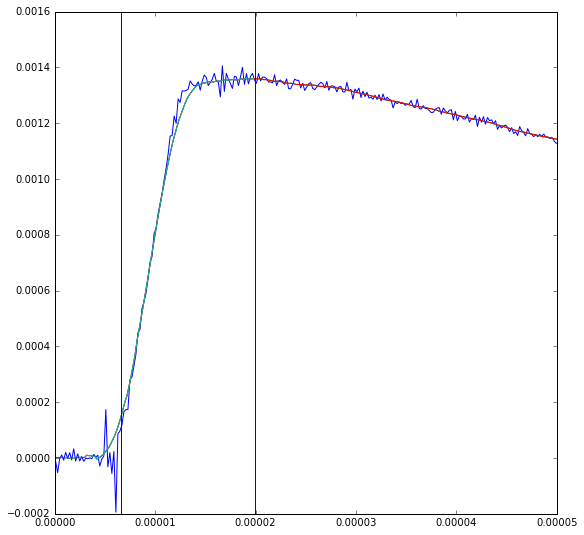

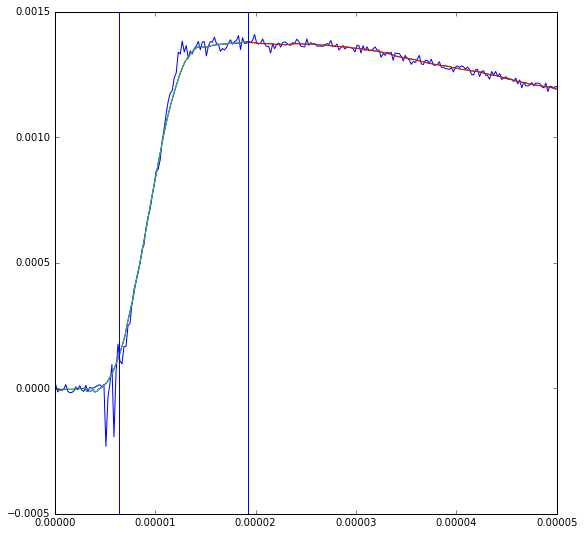

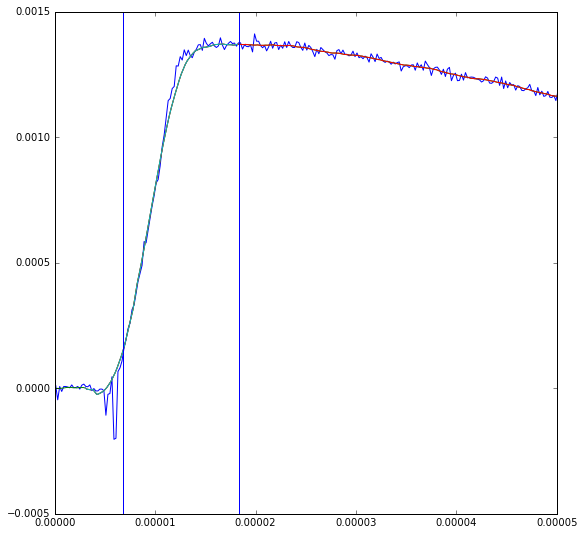

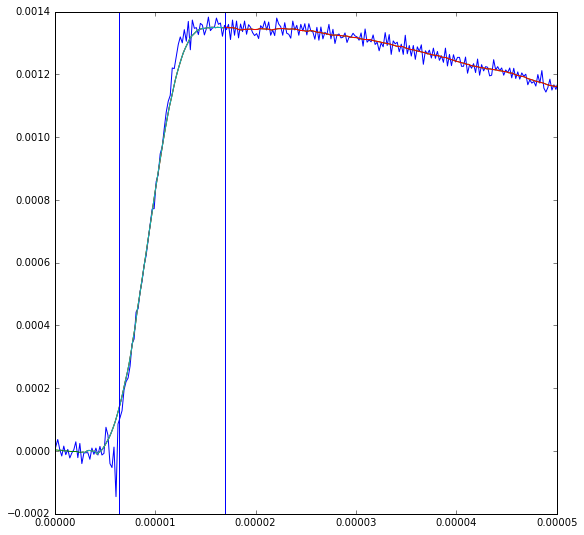

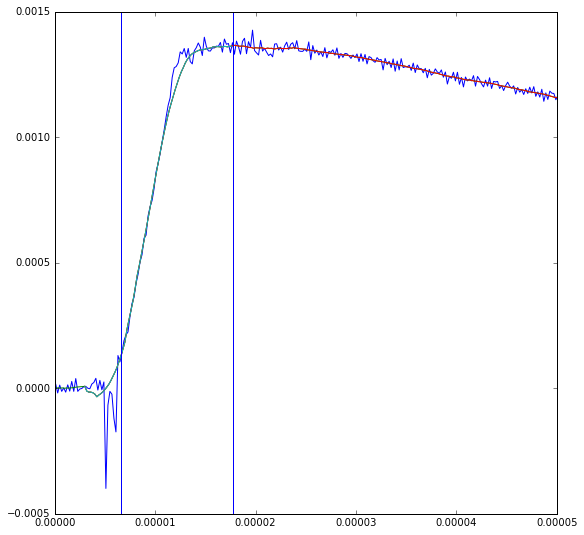

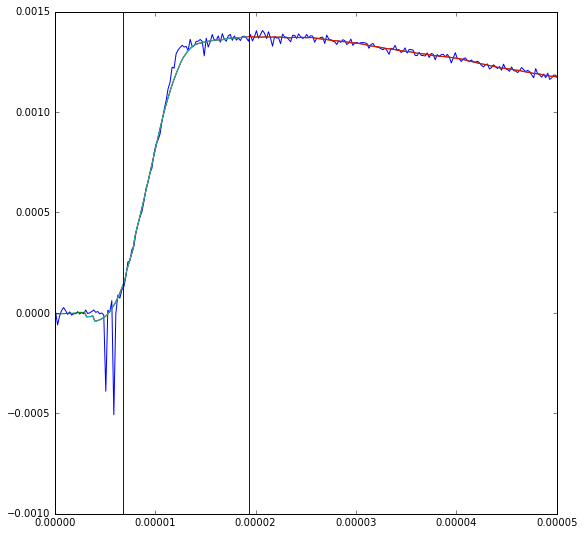

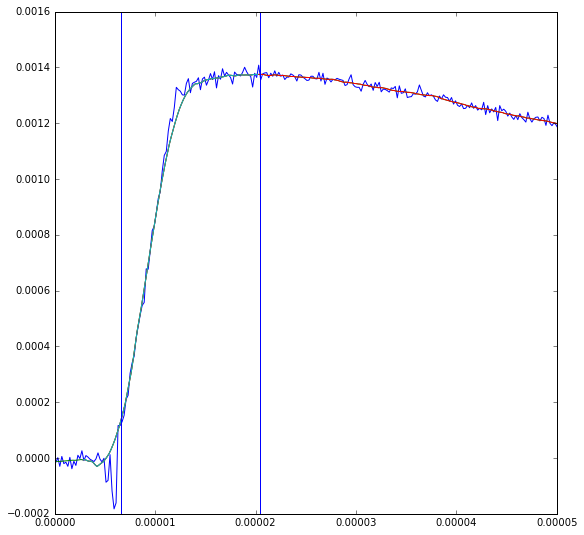

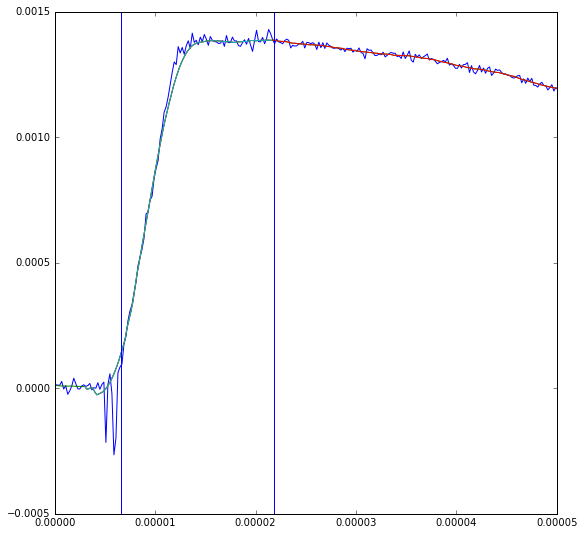

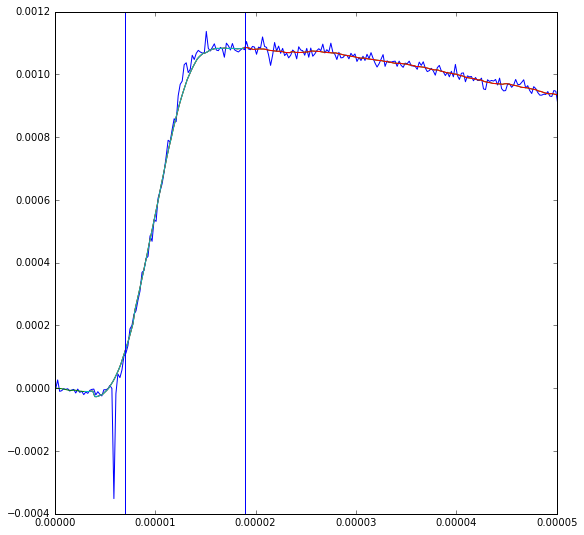

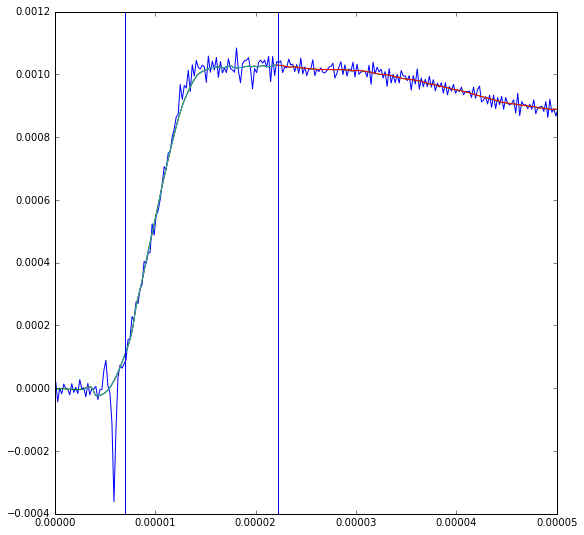

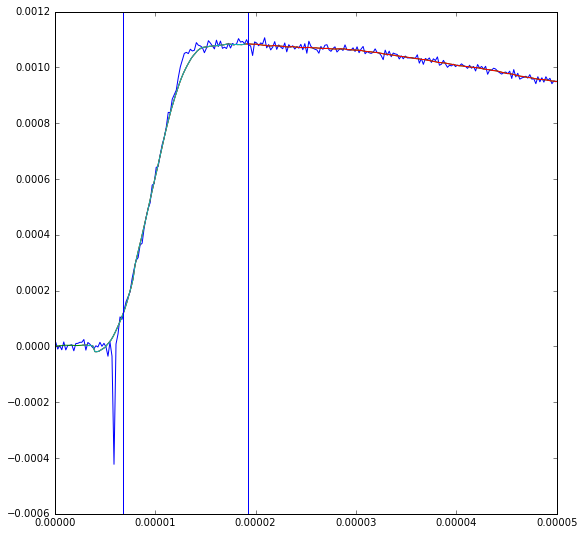

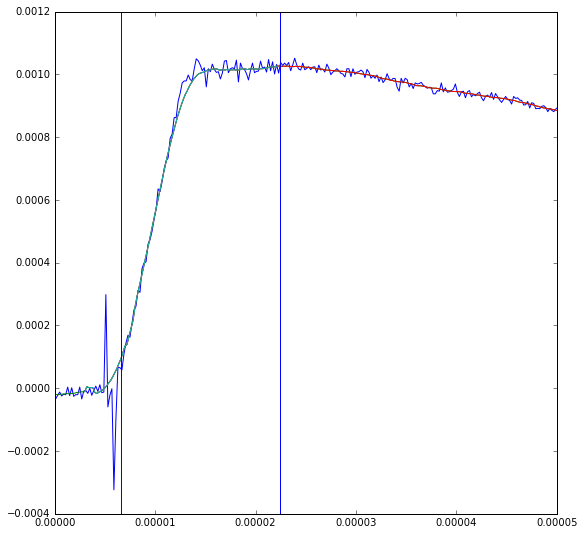

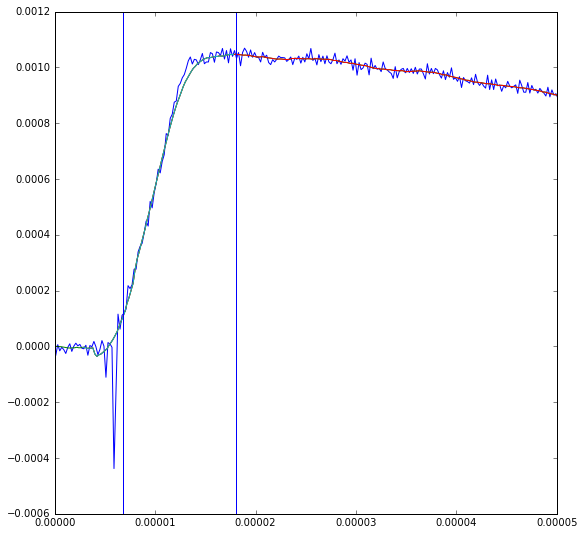

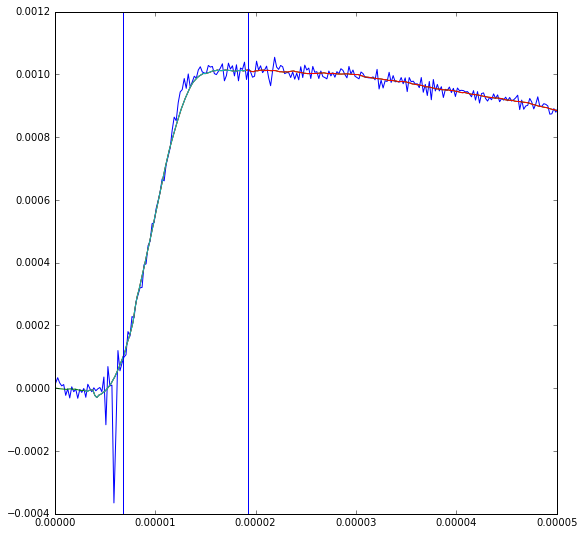

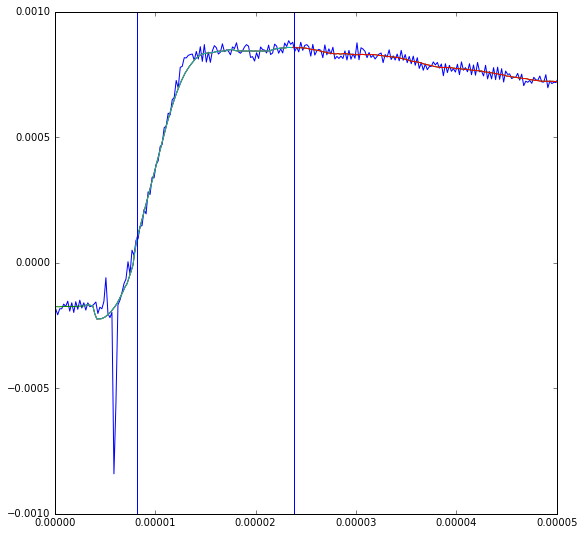

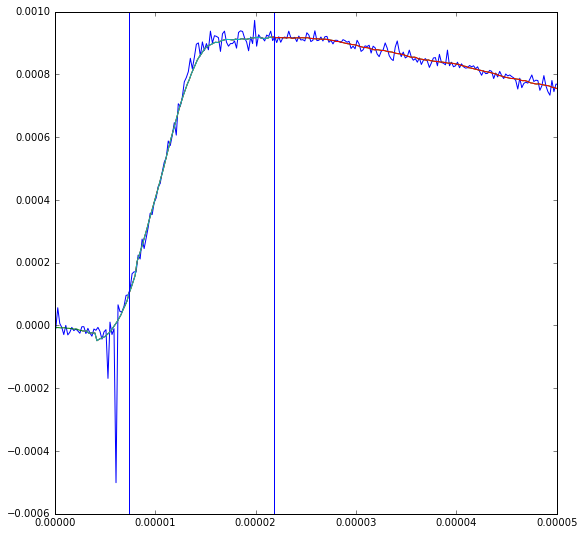

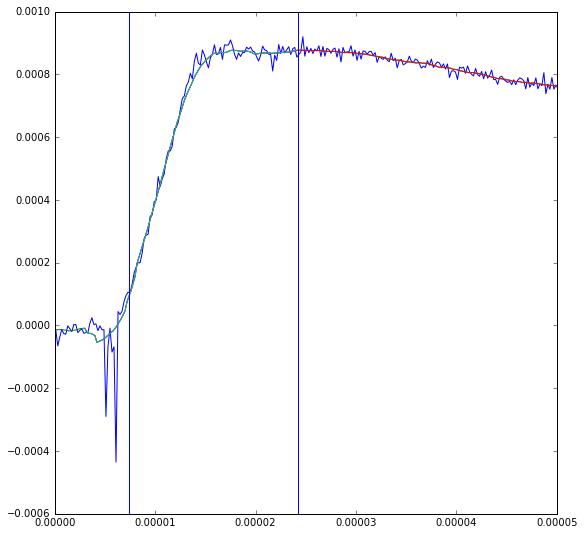

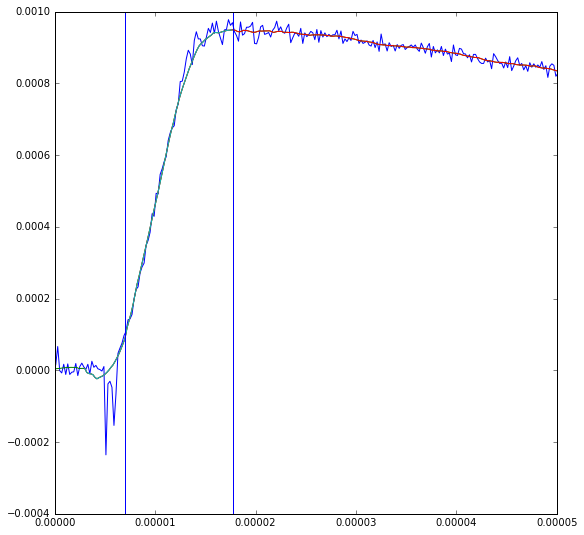

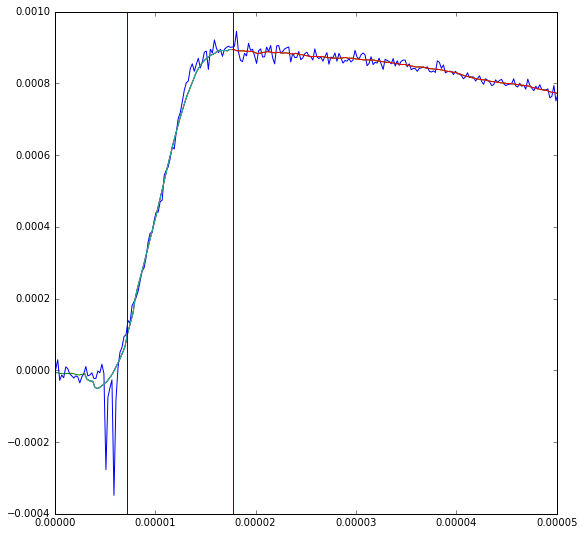

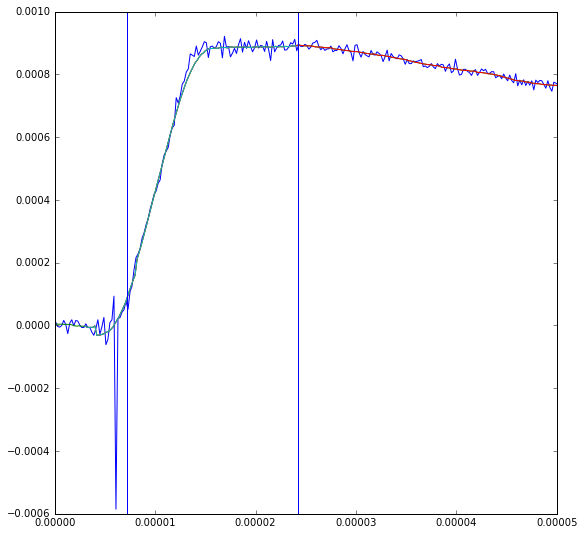

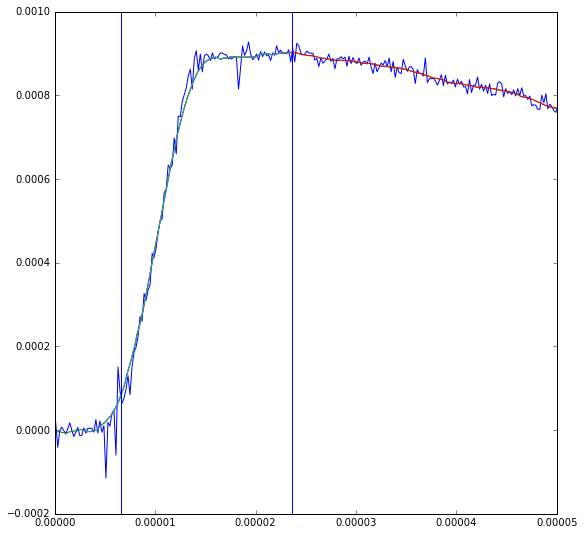

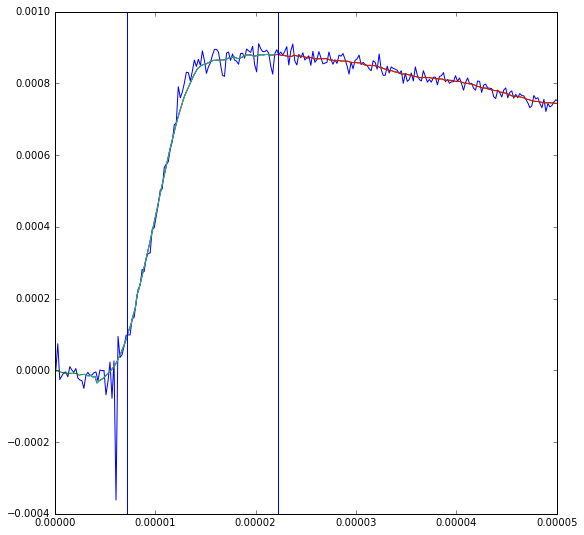

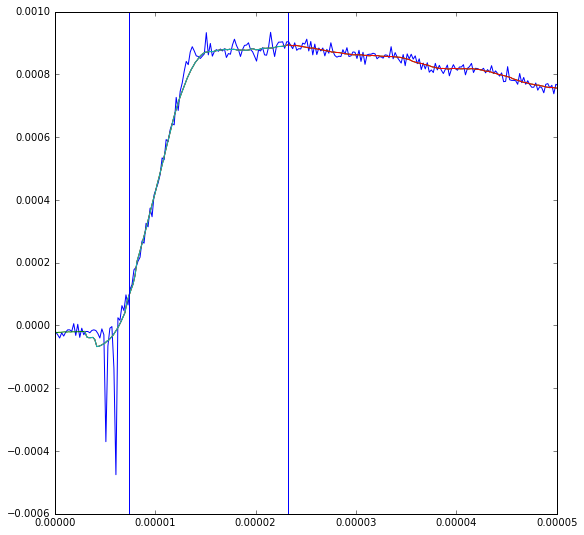

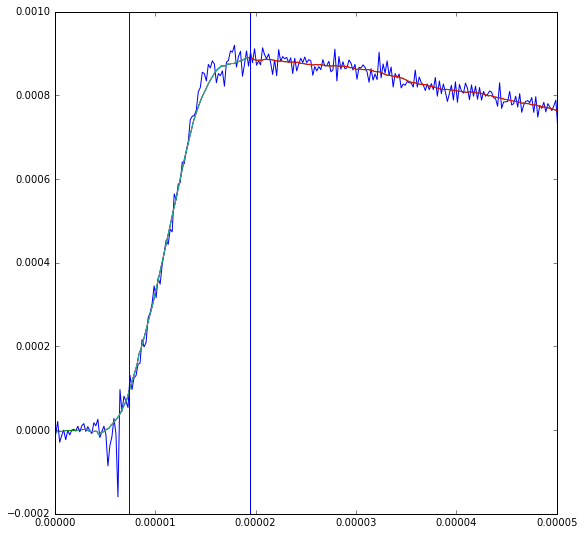

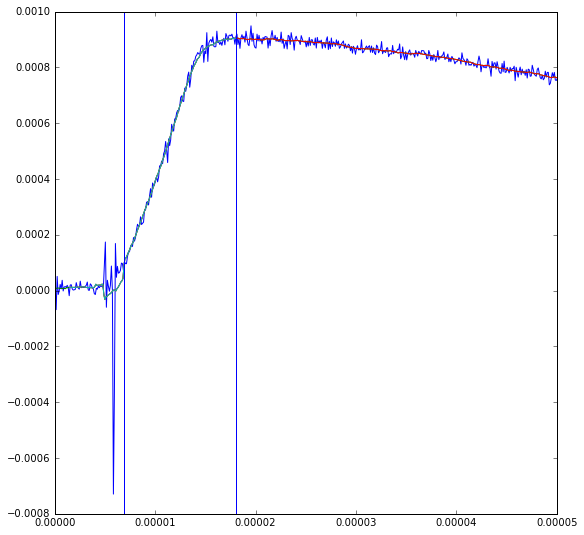

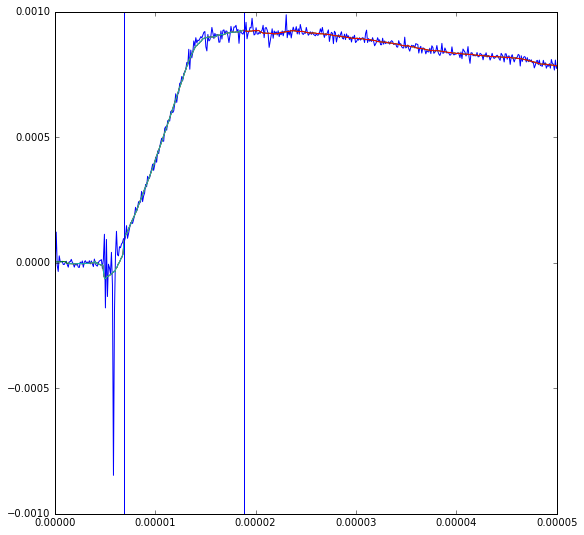

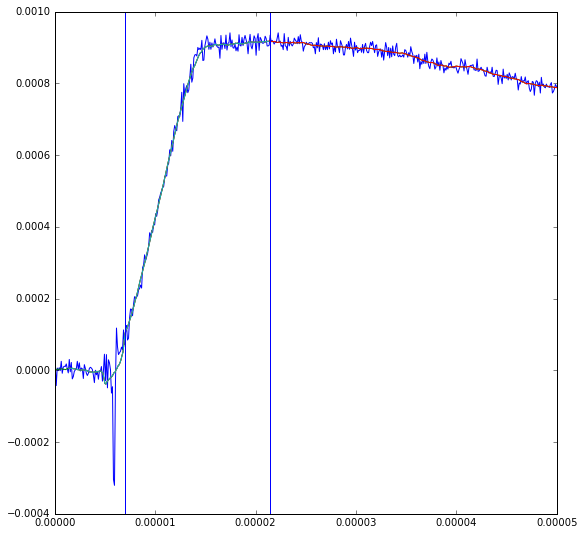

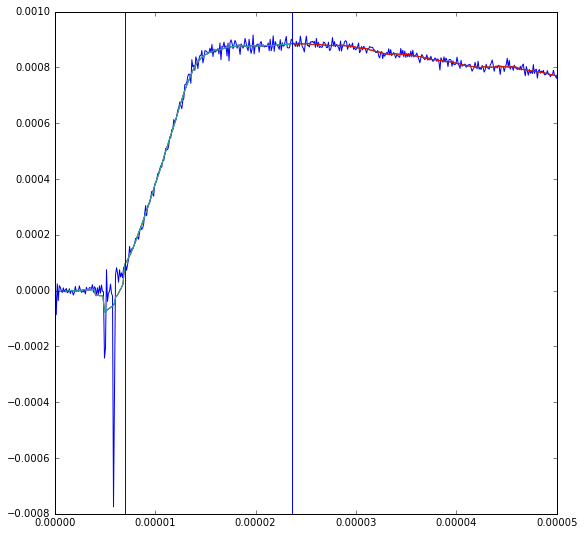

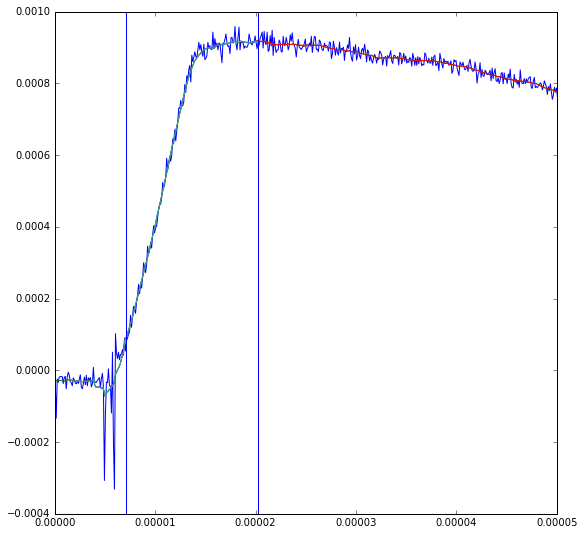

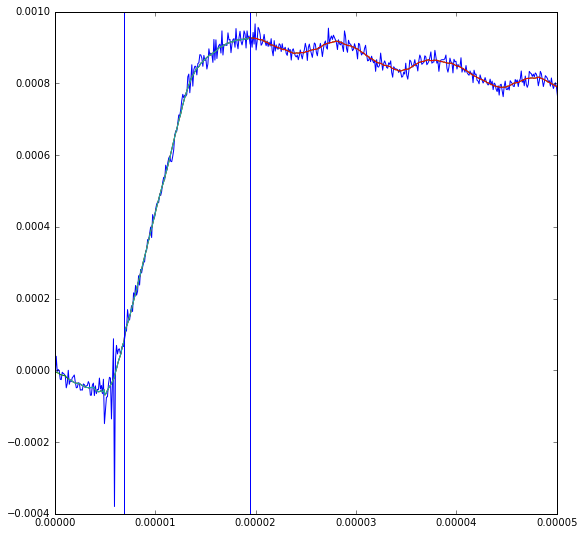

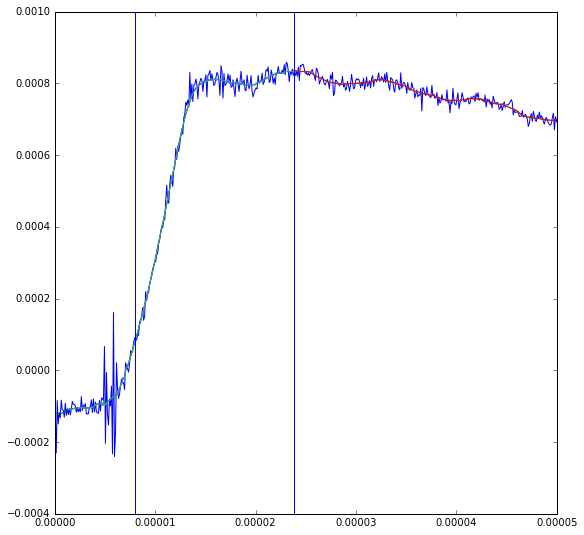

In [274]:
for A in range(0,len(files)):
    Data = np.loadtxt(files[A])
    plt.figure(figsize=(9,9))
    plt.plot(Data[0],Data[1])
    #MM, MIN, RE = FIND_MIN(Data[0],Data[2])
    #plt.axvline(Data[0][MM],color='r')
    #plt.axvline(Data[0][RE],color='k')
    TriggerTime = find_nearest(Data[0],0)
    Trigger     = np.where(Data[0]==TriggerTime)[0][0]+5

    xx = moving_average(Data[0],20)
    yy = moving_average(Data[1],20)
    plt.plot(xx,yy)

    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    plt.plot(xxx,yyy)
    maxy = max(yyy)

    hold      = find_nearest(yyy,maxy)
    holdd     = np.where(yyy==hold)[0][0]
    plt.axvline(xxx[holdd])
    #plt.axvline(Data[0][Trigger+holdd])

    xxx = xx[Trigger:Trigger+holdd]
    yyy = yy[Trigger:Trigger+holdd]
    plt.plot(xxx,yyy)
    hold      = find_nearest(yyy,maxy*0.1)
    holdd     = np.where(yyy==hold)[0][0]
    plt.axvline(xxx[holdd])


    plt.xlim(0,0.00005)
    plt.show()

In [397]:
files[65]

'Xe-085_P-0107_E-200.txt'

In [398]:
Data = np.loadtxt(files[65])

0.0001648000019258688

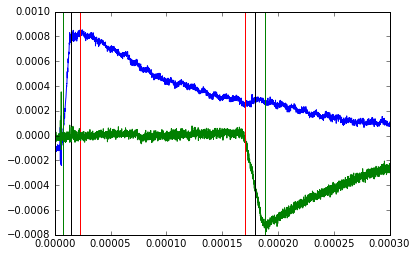

In [408]:
plt.plot(Data[0],Data[1])
pp,ee = FIND_MAX(Data[0],Data[1])
plt.axvline(Data[0][pp],color='r')
plt.axvline(Data[0][ee],color='g')
I = ee + int((pp-ee)/2)
plt.axvline(Data[0][I],color='k')

plt.plot(Data[0],Data[2])
MM, MIN, RE = FIND_MIN(Data[0],Data[2])
plt.axvline(Data[0][RE],color='r')
plt.axvline(Data[0][MM],color='g')
I2 = RE + int((MM-RE)/2)
plt.axvline(Data[0][I2],color='k')

plt.xlim(0,0.0003)

Data[0][I2]-Data[0][I]

In [409]:
Data[0][MM]-Data[0][RE]

1.8100000211518418e-05

In [ ]:
#    II = [name, percent, pressure, Efield]
#    INFO.append(II)

In [451]:
Erry =[]
Errx =[]

Tdrift=[]
for x in range(0,len(files)):
    Data = np.loadtxt(files[x])
    pp,ee = FIND_MAX(Data[0],Data[1])
    MM, MIN, RE = FIND_MIN(Data[0],Data[2])
    P = INFO[x][2]
    T0 = ee + int((pp-ee)/2)
    T0 = Data[0][T0]
    T1 = RE + int((MM-RE)/2)
    T1 = Data[0][T1]
    DT = (T1-T0)
    er = np.sqrt((0.1/13.8)**2+2*(0/DT)**2)
    Tdrift.append(13.8*1e-5/DT)
    Erry.append(er)
    er2 = np.sqrt((0.1/INFO[x][3])**2+(0.05/INFO[x][2])**2+(0.1/13.8)**2)
    Errx.append(er2)

In [364]:
np.sqrt((0.1/200)**2+(6e-6/DT)**2)

1.4953262396963767e-05

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 2.6)

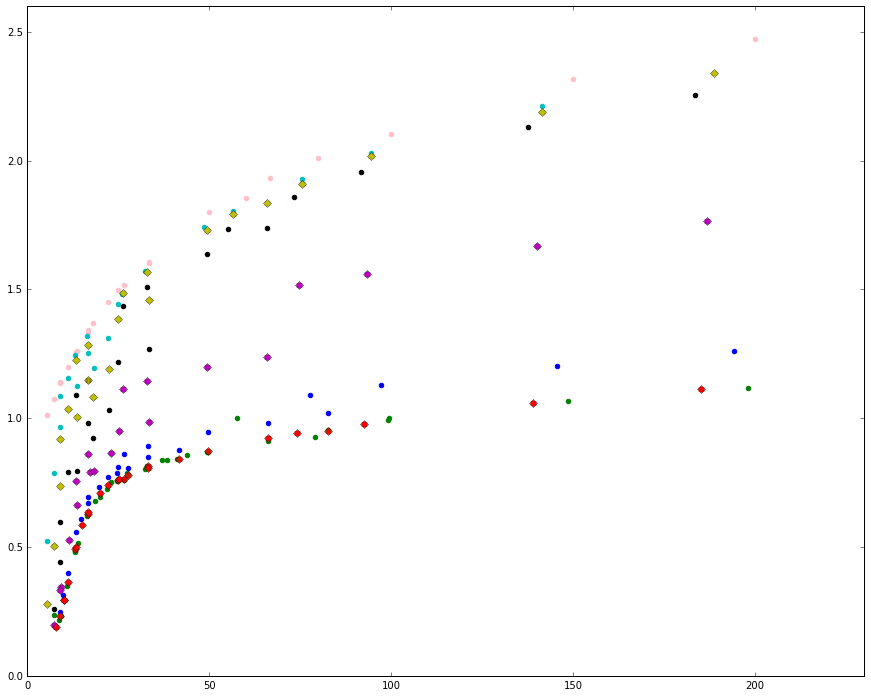

In [452]:
eh=0
plt.figure(figsize=(15,12))

for x in range(0,len(files)):
    eh=0
    if INFO[x][1] == 99:
        
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')
        plt.errorbar(INFO[x][3]/INFO[x][2],Tdrift[x],yerr=Erry[x],color='r',alpha=0.7,fmt='D',linewidth=1.4)
        eh+=1
    if INFO[x][1] == 100:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g')
        
    if INFO[x][1] == 95:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b')
    if INFO[x][1] == 85:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m') 
        plt.errorbar(INFO[x][3]/INFO[x][2],Tdrift[x],yerr=Erry[x],color='m',alpha=0.7,fmt='D',linewidth=1.4)

    if INFO[x][1] == 65:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k') 
    
    
    if INFO[x][1] == 50:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='y')  
        plt.errorbar(INFO[x][3]/INFO[x][2],Tdrift[x],yerr=Erry[x],color='y',alpha=0.7,fmt='D',linewidth=1.4)
        
    if INFO[x][1] == 35:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='c')
        
    if INFO[x][1] == 0:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='pink')
        
#plt.scatter(MagX5,MagY5,color='k',alpha = 0.3)
#plt.scatter(Mx35,My35,color='b',alpha = 0.3)
plt.legend()
plt.xlim(0,230)
plt.ylim(0,2.6)

In [345]:
MagX5 = np.array([   0.        ,   81.06666667,  121.6       ,  162.13333333,
        202.66666667,  304.        ,  405.33333333,  506.66666667,
        608.        ,  709.33333333,  810.66666667,    0.        ,
         60.8       ,   81.06666667,  101.33333333,  152.        ,
        202.66666667,  253.33333333,  304.        ,  354.66666667,
        405.33333333,    0.        ,    6.75555556,   13.51111111,
         20.26666667,   27.02222222,   33.77777778,   50.66666667,
         67.55555556,   84.44444444,  101.33333333,  118.22222222,
        135.11111111,    0.        ,    4.05333333,    8.10666667,
         12.16      ,   16.21333333,   20.26666667,   30.4       ,
         40.53333333,   50.66666667,   60.8       ,   70.93333333,
         81.06666667,    0.        ,    2.8952381 ,    5.79047619,
          8.68571429,   11.58095238,   14.47619048,   21.71428571,
         28.95238095,   36.19047619,   43.42857143,   50.66666667,
         57.9047619 ,    0.        ,    2.25185185,    4.5037037 ,
          6.75555556,    9.00740741,   11.25925926,   16.88888889,
         22.51851852,   28.14814815,   33.77777778,   39.40740741,
         45.03703704,    0.        ,    1.84242424,    3.68484848,
          5.52727273,    7.36969697,    9.21212121,   13.81818182,
         23.03030303,   27.63636364,   32.24242424,   36.84848485])
MagY5 = np.array([-0.01544,  2.069  ,  2.365  ,  2.466  ,  2.605  ,  2.826  ,
        3.077  ,  3.248  ,  3.506  ,  3.82   ,  4.303  , -0.01544,
        1.993  ,  2.069  ,  2.217  ,  2.43   ,  2.605  ,  2.72   ,
        2.826  ,  2.888  ,  3.077  , -0.01544,  1.158  ,  1.365  ,
        1.544  ,  1.642  ,  1.749  ,  1.914  ,  2.006  ,  2.113  ,
        2.217  ,  2.294  ,  2.346  , -0.01544,  0.9869 ,  1.186  ,
        1.364  ,  1.449  ,  1.544  ,  1.651  ,  1.754  ,  1.914  ,
        1.993  ,  2.035  ,  2.069  , -0.01544,  0.8863 ,  1.112  ,
        1.268  ,  1.36   ,  1.399  ,  1.539  ,  1.649  ,  1.766  ,
        1.843  ,  1.914  ,  1.96   , -0.01544,  0.778  ,  1.055  ,
        1.158  ,  0.     ,  1.339  ,  0.     ,  1.557  ,  1.625  ,
        1.749  ,  1.765  ,  1.824  , -0.01544,  0.6175 ,  1.022  ,
        1.116  ,  0.     ,  1.248  ,  1.404  ,  1.536  ,  1.655  ,
        1.7    ,  1.744  ])

In [347]:
Mx35 = np.array([   0.        ,   40.53333333,   81.06666667,  121.6       ,
        162.13333333,  202.66666667,  304.        ,  405.33333333,
        506.66666667,  608.        ,  709.33333333,  810.66666667,
          0.        ,   20.26666667,   40.53333333,   60.8       ,
         81.06666667,  101.33333333,  152.        ,  202.66666667,
        253.33333333,  304.        ,  354.66666667,  405.33333333,
          0.        ,    6.75555556,   13.51111111,   20.26666667,
         27.02222222,   33.77777778,   50.66666667,   67.55555556,
         84.44444444,  101.33333333,  118.22222222,  135.11111111,
          0.        ,    4.05333333,    8.10666667,   12.16      ,
         16.21333333,   20.26666667,   30.4       ,   40.53333333,
         50.66666667,   60.8       ,   70.93333333,   81.06666667,
          0.        ,    2.8952381 ,    5.79047619,    8.68571429,
         11.58095238,   14.47619048,   21.71428571,   28.95238095,
         36.19047619,   43.42857143,   50.66666667,   57.9047619 ,
          0.        ,    2.25185185,    4.5037037 ,    6.75555556,
          9.00740741,   11.25925926,   16.88888889,   22.51851852,
         28.14814815,   33.77777778,   39.40740741,   45.03703704,
          0.        ,    1.84242424,    3.68484848,    5.52727273,
          7.36969697,    9.21212121,   13.81818182,   18.42424242,
         23.03030303,   27.63636364,   32.24242424,   36.84848485])
My35 = np.array([ -2.27900000e-03,   1.45000000e+00,   1.63500000e+00,
         1.74100000e+00,   1.81900000e+00,   1.88900000e+00,
         2.06900000e+00,   2.19300000e+00,   2.27400000e+00,
         2.41300000e+00,   2.72300000e+00,   3.13400000e+00,
        -2.27900000e-03,   1.34700000e+00,   1.45000000e+00,
         1.55300000e+00,   1.63500000e+00,   1.68600000e+00,
         1.78700000e+00,   1.88900000e+00,   1.98400000e+00,
         2.06900000e+00,   2.15600000e+00,   2.19300000e+00,
        -2.27900000e-03,   7.78300000e-01,   1.23700000e+00,
         1.34700000e+00,   1.38300000e+00,   1.44100000e+00,
         1.48100000e+00,   1.56400000e+00,   1.64500000e+00,
         1.68600000e+00,   0.00000000e+00,   1.75800000e+00,
        -2.27900000e-03,   0.00000000e+00,   1.00600000e+00,
         1.17100000e+00,   1.31800000e+00,   1.34700000e+00,
         1.38400000e+00,   1.45000000e+00,   1.48100000e+00,
         1.55300000e+00,   1.60400000e+00,   1.63500000e+00,
        -2.27900000e-03,   0.00000000e+00,   6.22000000e-01,
         1.03100000e+00,   1.21000000e+00,   1.26000000e+00,
         1.35600000e+00,   1.38100000e+00,   1.41700000e+00,
         1.45400000e+00,   1.48100000e+00,   1.51400000e+00,
        -2.27900000e-03,   0.00000000e+00,   4.43400000e-01,
         7.78300000e-01,   1.08600000e+00,   1.14400000e+00,
         1.27700000e+00,   1.32500000e+00,   1.40700000e+00,
         1.44100000e+00,   1.43100000e+00,   1.44100000e+00,
        -2.27900000e-03,   8.11400000e-02,   3.05100000e-01,
         8.24500000e-01,   9.48200000e-01,   1.07800000e+00,
         1.22400000e+00,   1.29500000e+00,   1.36300000e+00,
         1.38000000e+00,   1.41300000e+00,   1.40800000e+00])

In [ ]:
II = [name, percent, pressure, Efield]

['Xe-099_P-0108_E-080', 99, 1.08, 80]
['Xe-099_P-0108_E-100', 99, 1.08, 100]
['Xe-099_P-0108_E-150', 99, 1.08, 150]
['Xe-099_P-0108_E-200', 99, 1.08, 200]
['Xe-099_P-0108_E-250', 99, 1.08, 250]
['Xe-099_P-0302_E-040', 99, 3.02, 40]
['Xe-099_P-0302_E-080', 99, 3.02, 80]
['Xe-099_P-0302_E-100', 99, 3.02, 100]
['Xe-099_P-0302_E-150', 99, 3.02, 150]
['Xe-099_P-0302_E-200', 99, 3.02, 200]
['Xe-099_P-0302_E-250', 99, 3.02, 250]
['Xe-099_P-0601_E-060', 99, 6.01, 60]
['Xe-099_P-0601_E-080', 99, 6.01, 80]
['Xe-099_P-0601_E-100', 99, 6.01, 100]
['Xe-099_P-0601_E-150', 99, 6.01, 150]
['Xe-099_P-0601_E-200', 99, 6.01, 200]
['Xe-099_P-0601_E-250', 99, 6.01, 250]
['Xe-099_P-0901_E-080', 99, 9.01, 80]
['Xe-099_P-0901_E-100', 99, 9.01, 100]
['Xe-099_P-0901_E-150', 99, 9.01, 150]
['Xe-099_P-0901_E-200', 99, 9.01, 200]
['Xe-099_P-0901_E-250', 99, 9.01, 250]
['Xe-099_P-0995_E-080', 99, 9.95, 80]
['Xe-099_P-0995_E-100', 99, 9.95, 100]
['Xe-099_P-0995_E-150', 99, 9.95, 150]
['Xe-099_P-0995_E-200', 99, 9.95

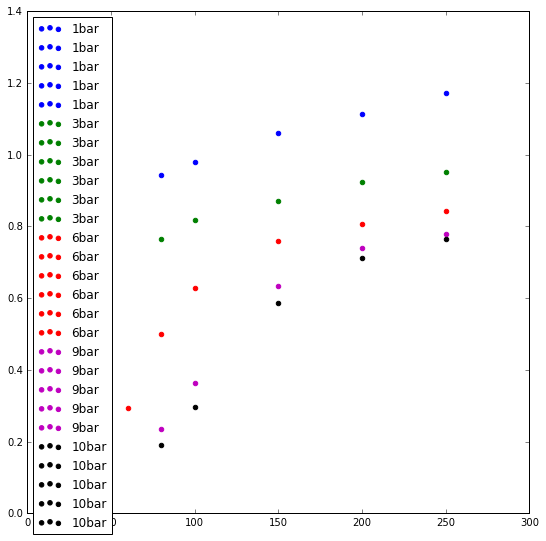

In [383]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 99:
        print(INFO[x])
        if INFO[x][2] == 1.08:
            plt.scatter(INFO[x][3],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.02:
            plt.scatter(INFO[x][3],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6.01:
            plt.scatter(INFO[x][3],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 9.01:
            plt.scatter(INFO[x][3],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 9.95:
            plt.scatter(INFO[x][3],Tdrift[x],color='k',label='10bar')       
plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

['Xe-085_P-0107_E-080', 85, 1.07, 80]
['Xe-085_P-0107_E-100', 85, 1.07, 100]
['Xe-085_P-0107_E-150', 85, 1.07, 150]
['Xe-085_P-0107_E-200', 85, 1.07, 200]
['Xe-085_P-0303_E-080', 85, 3.03, 80]
['Xe-085_P-0303_E-100', 85, 3.03, 100]
['Xe-085_P-0303_E-150', 85, 3.03, 150]
['Xe-085_P-0303_E-200', 85, 3.03, 200]
['Xe-085_P-0596_E-080', 85, 5.96, 80]
['Xe-085_P-0596_E-100', 85, 5.96, 100]
['Xe-085_P-0596_E-150', 85, 5.96, 150]
['Xe-085_P-0596_E-200', 85, 5.96, 200]
['Xe-085_P-0869_E-080', 85, 8.69, 80]
['Xe-085_P-0869_E-100', 85, 8.69, 100]
['Xe-085_P-0869_E-150', 85, 8.69, 150]
['Xe-085_P-0869_E-200', 85, 8.69, 200]
['Xe-085_P-1094_E-080', 85, 10.94, 80]
['Xe-085_P-1094_E-100', 85, 10.94, 100]
['Xe-085_P-1094_E-150', 85, 10.94, 150]
['Xe-085_P-1094_E-200', 85, 10.94, 200]


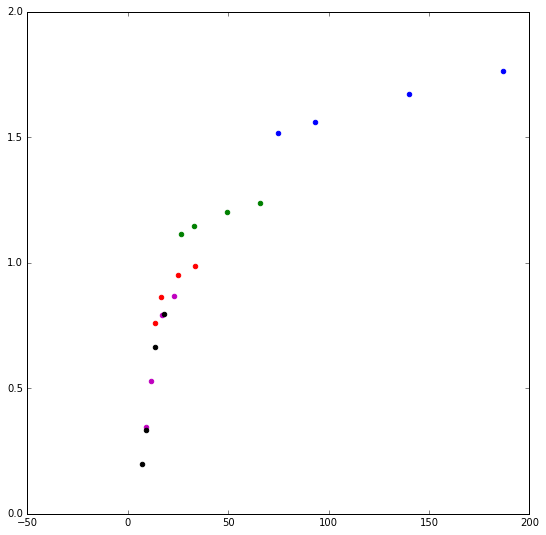

In [427]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 85:
        print(INFO[x])
        if INFO[x][2] == 1.07:
            plt.scatter(INFO[x][3]/1.07,Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.03:
            plt.scatter(INFO[x][3]/3.03,Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 5.96:
            plt.scatter(INFO[x][3]/5.96,Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 8.69:
            plt.scatter(INFO[x][3]/8.69,Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 10.94:
            plt.scatter(INFO[x][3]/10.94,Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

['Xe-050_P-0106_E-060', 50, 1.06, 60]
['Xe-050_P-0106_E-080', 50, 1.06, 80]
['Xe-050_P-0106_E-100', 50, 1.06, 100]
['Xe-050_P-0106_E-150', 50, 1.06, 150]
['Xe-050_P-0106_E-200', 50, 1.06, 200]
['Xe-050_P-0304_E-080', 50, 3.04, 80]
['Xe-050_P-0304_E-100', 50, 3.04, 100]
['Xe-050_P-0304_E-150', 50, 3.04, 150]
['Xe-050_P-0304_E-200', 50, 3.04, 200]
['Xe-050_P-0600_E-080', 50, 6.0, 80]
['Xe-050_P-0600_E-100', 50, 6.0, 100]
['Xe-050_P-0600_E-150', 50, 6.0, 150]
['Xe-050_P-0600_E-200', 50, 6.0, 200]
['Xe-050_P-0891_E-080', 50, 8.91, 80]
['Xe-050_P-0891_E-100', 50, 8.91, 100]
['Xe-050_P-0891_E-150', 50, 8.91, 150]
['Xe-050_P-0891_E-200', 50, 8.91, 200]
['Xe-050_P-1102_E-060', 50, 11.02, 60]
['Xe-050_P-1102_E-080', 50, 11.02, 80]
['Xe-050_P-1102_E-100', 50, 11.02, 100]
['Xe-050_P-1102_E-150', 50, 11.02, 150]
['Xe-050_P-1102_E-200', 50, 11.02, 200]


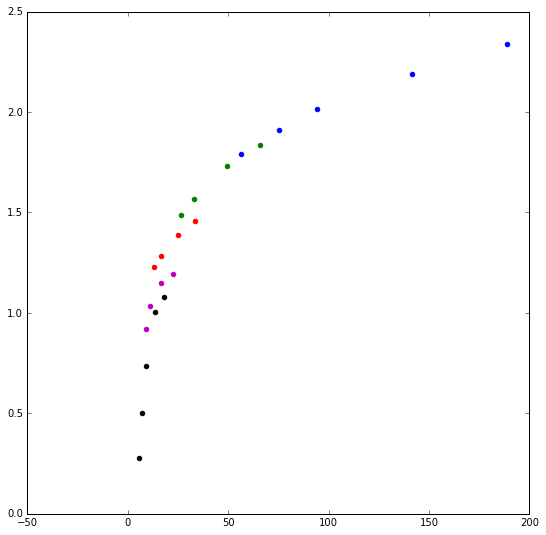

In [424]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 50:
        print(INFO[x])
        if INFO[x][2] == 1.06:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.04:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6.0:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 8.91:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 11.02:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

['Xe-035_P-0106_E-060', 35, 1.06, 60]
['Xe-035_P-0106_E-080', 35, 1.06, 80]
['Xe-035_P-0106_E-100', 35, 1.06, 100]
['Xe-035_P-0106_E-150', 35, 1.06, 150]
['Xe-035_P-0308_E-080', 35, 3.08, 80]
['Xe-035_P-0308_E-100', 35, 3.08, 100]
['Xe-035_P-0308_E-150', 35, 3.08, 150]
['Xe-035_P-0604_E-080', 35, 6.04, 80]
['Xe-035_P-0604_E-100', 35, 6.04, 100]
['Xe-035_P-0604_E-150', 35, 6.04, 150]
['Xe-035_P-0897_E-080', 35, 8.97, 80]
['Xe-035_P-0897_E-100', 35, 8.97, 100]
['Xe-035_P-0897_E-150', 35, 8.97, 150]
['Xe-035_P-0897_E-200', 35, 8.97, 200]
['Xe-035_P-1096_E-060', 35, 10.96, 60]
['Xe-035_P-1096_E-080', 35, 10.96, 80]
['Xe-035_P-1096_E-100', 35, 10.96, 100]
['Xe-035_P-1096_E-150', 35, 10.96, 150]
['Xe-035_P-1096_E-200', 35, 10.96, 200]


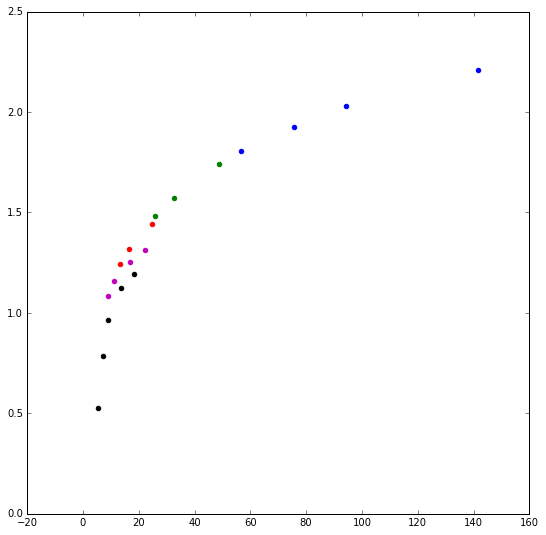

In [429]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 35:
        print(INFO[x])
        if INFO[x][2] == 1.06:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.08:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6.04:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 8.97:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 10.96:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

['Xe-000_P-01_E-060', 0, 1.0, 60]
['Xe-000_P-01_E-080', 0, 1.0, 80]
['Xe-000_P-01_E-100', 0, 1.0, 100]
['Xe-000_P-01_E-150', 0, 1.0, 150]
['Xe-000_P-01_E-200', 0, 1.0, 200]
['Xe-000_P-03_E-080', 0, 3.0, 80]
['Xe-000_P-03_E-100', 0, 3.0, 100]
['Xe-000_P-03_E-150', 0, 3.0, 150]
['Xe-000_P-03_E-200', 0, 3.0, 200]
['Xe-000_P-06_E-080', 0, 6.0, 80]
['Xe-000_P-06_E-100', 0, 6.0, 100]
['Xe-000_P-06_E-150', 0, 6.0, 150]
['Xe-000_P-06_E-200', 0, 6.0, 200]
['Xe-000_P-09_E-080', 0, 9.0, 80]
['Xe-000_P-09_E-100', 0, 9.0, 100]
['Xe-000_P-09_E-150', 0, 9.0, 150]
['Xe-000_P-09_E-200', 0, 9.0, 200]
['Xe-000_P-11_E-060', 0, 11.0, 60]
['Xe-000_P-11_E-080', 0, 11.0, 80]
['Xe-000_P-11_E-100', 0, 11.0, 100]
['Xe-000_P-11_E-150', 0, 11.0, 150]
['Xe-000_P-11_E-200', 0, 11.0, 200]


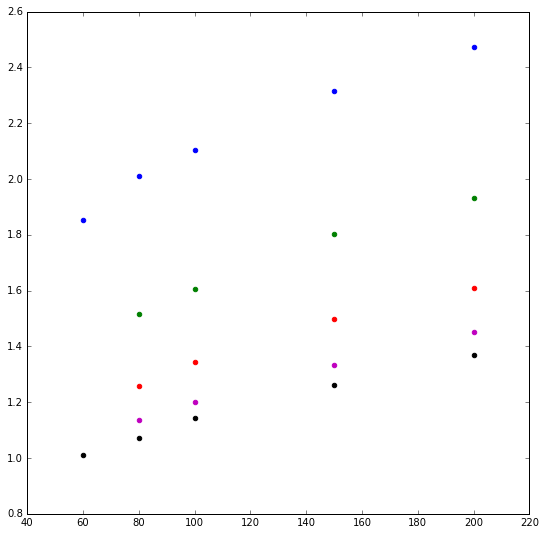

In [441]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 0:
        print(INFO[x])
        if INFO[x][2] == 1:
            plt.scatter(INFO[x][3],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3:
            plt.scatter(INFO[x][3],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6:
            plt.scatter(INFO[x][3],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 9:
            plt.scatter(INFO[x][3],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 11:
            plt.scatter(INFO[x][3],Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

In [226]:
eh

27

In [227]:
36+27

63

In [212]:
len(INFO)

63

In [ ]:
plt.axvline(Data[0][pp],color='r')
plt.axvline(Data[0][ee],color='g')

In [165]:
(Data[0][pp]-Data[0][ee])/2

5.9500000695322949e-06

In [ ]:
Data = np.loadtxt(files[4])

In [166]:
pp,ee = FIND_MAX(Data[0],Data[1])
T0 = (Data[0][pp]-Data[0][ee])/2

MM, MIN, RE = FIND_MIN(Data[0],Data[2])
T1 = (Data[0][MM]-Data[0][RE])/2

In [168]:
T1-T0

1.6000000186977135e-06

In [169]:
T1

7.5500000882300084e-06

In [170]:
T0

5.9500000695322949e-06

In [355]:
tt = '1056'
a, b = tt[:2], tt[2:]
ff = a+'.'+b
float(ff)

10.56

In [353]:
a

NameError: name 'a' is not defined